# **Project Report**

## **Introduction**

This project aims to analyze accelerometer and TAC (Transdermal Alcohol Concentration) data to predict whether a person is drunk or sober based on their movement patterns and TAC readings. It also calculates Permutation entropy(measures the unpredictability of the time series), while complexity quantifies the irregularity and complexity of the data. The project involves several key steps including data preprocessing, feature engineering, model building, and evaluation.

## **Data Preparation**

#### Loading the Data
I begin by loading the accelerometer data from a CSV file into a Pandas DataFrame. The data consists of timestamped accelerometer readings along with the TAC readings for multiple participants (PIDs).

#### Data Cleaning
Basic data cleaning tasks are performed, including checking for missing values and renaming columns. Additionally, invalid timestamp rows are dropped from the dataset to ensure data integrity.

## **Exploratory Data Analysis (EDA)**

#### Visualization of Data
I visualize the accelerometer data for each PID to understand the movement patterns and observe any trends or anomalies. These visualizations provide insights into how the data varies across different participants and can help identify patterns indicative of intoxication.

## **Feature Engineering**

#### Calculating Permutation Entropy and Complexity
I compute permutation entropy and complexity for each segment(segmenting the data based on changes in alcohol concentration i.e TAC_Reading) and axis of the accelerometer data. Permutation entropy measures the unpredictability of the time series, while complexity quantifies the irregularity and complexity of the data.

#### **Analysis of Permutation Entropy and Complexity**
Here i got that Permutation entropy tends to be relatively high across all PIDs and axes, indicating a significant level of variability and complexity in movement patterns. Whereas Complexity values display considerable variation, suggesting that movement patterns encompass a mix of both regular and irregular behavior. Thus it can be said that permutation entropy and complexity method is not reliable in differentiating heavy drinking vs sober cases for this particular data.

## **Baseline Model Building**

#### Data Preparation for Model
The dataset is prepared for model training by setting target labels (1 for drunk, 0 for sober) based on TAC readings. The data is then split into training and testing sets for model evaluation.

#### Random Forest Classifier
A baseline Random Forest classifier is trained using the training data to predict the target labels. The model's performance is evaluated using accuracy as the metric.

## **Model Evaluation**

#### Classification Report
A classification report is generated to provide detailed metrics such as precision, recall, and F1-score for both drunk and sober classes. This report offers insights into the model's performance across different evaluation metrics.

#### Confusion Matrix Visualization
The confusion matrix is visualized to gain a deeper understanding of the model's performance in predicting drunk and sober labels. This visualization helps identify any misclassifications and assess the overall model accuracy.

By following these steps, we aim to develop an effective model for predicting intoxication based on accelerometer data and TAC readings, with the ultimate goal of contributing to the field of alcohol intoxication detection and prevention.




In [ ]:
# will mount google drive into the collab environment
# this will allow to easily handle files enabling tasks like reading, writing, and manipulation within the Colab environment

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set working directory
# it will consider this location as the current folder
# so if I want to access or save files it will do it here

%cd /content/drive/MyDrive/NEU_LECTURES/FDA/PROJECT2/data/



/content/drive/MyDrive/NEU_LECTURES/FDA/PROJECT2/data


## Data Preparation

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the Data

df_acc = pd.read_csv('all_accelerometer_data_pids_13.csv')


In [ ]:
df_acc

time     pid         x         y         z
0                     0  JB3156  0.000000  0.000000  0.000000
1                     0  CC6740  0.000000  0.000000  0.000000
2         1493733882409  SA0297  0.075800  0.027300 -0.010200
3         1493733882455  SA0297 -0.035900  0.079400  0.003700
4         1493733882500  SA0297 -0.242700 -0.086100 -0.016300
...                 ...     ...       ...       ...       ...
14057562  1493829248196  CC6740 -0.133956  0.124726 -0.010736
14057563  1493829248220  CC6740 -0.100764  0.180872  0.046449
14057564  1493829248245  CC6740 -0.131853  0.195934  0.181088
14057565  1493829248270  CC6740 -0.149704  0.194482  0.202393
14057566  1493829248294  CC6740 -0.107288  0.153548  0.168595

[14057567 rows x 5 columns]

## Data Cleaning

In [ ]:
# Checking if there are any possible missing values

df_acc.isnull().sum()

time    0
pid     0
x       0
y       0
z       0
dtype: int64

In [ ]:
# Checking the  data types

df_acc.dtypes

time      int64
pid      object
x       float64
y       float64
z       float64
dtype: object

In [ ]:
df_acc.head(5)

time     pid       x       y       z
0              0  JB3156  0.0000  0.0000  0.0000
1              0  CC6740  0.0000  0.0000  0.0000
2  1493733882409  SA0297  0.0758  0.0273 -0.0102
3  1493733882455  SA0297 -0.0359  0.0794  0.0037
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163

In [ ]:
# first two rows contain invalid timestamps
# Droping the first two rows

df_acc = df_acc.drop([0, 1]).reset_index(drop=True)


In [ ]:
df_acc.head(5)

time     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105

In [ ]:
# Renaming columns

df_acc = df_acc.rename(columns={"time":"timestamp"})
df_acc.head()

timestamp     pid       x       y       z
0  1493733882409  SA0297  0.0758  0.0273 -0.0102
1  1493733882455  SA0297 -0.0359  0.0794  0.0037
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105

In [ ]:
# Converting the timestamp values from milliseconds to seconds by performing floor division
# Floor division (//) is a mathematical operation that divides two numbers and rounds down the result to the nearest integer.
# This operation ensures that the timestamp values are represented in seconds rather than milliseconds

df_acc['timestamp'] = (df_acc['timestamp'])//1000


## Combining all the csv files

In [ ]:
%cd clean_tac/

/content/drive/MyDrive/NEU_LECTURES/FDA/PROJECT2/data/clean_tac


In [ ]:
# Define the directory containing my CSV files
directory = '/content/drive/MyDrive/NEU_LECTURES/FDA/PROJECT2/data/clean_tac/'


import pandas as pd

# Listing all the filenames
filenames = [
    'SA0297_clean_TAC.csv',
    'BK7610_clean_TAC.csv',
    'BU4707_clean_TAC.csv',
    'CC6740_clean_TAC.csv',
    'DC6359_clean_TAC.csv',
    'DK3500_clean_TAC.csv',
    'HV0618_clean_TAC.csv',
    'JB3156_clean_TAC.csv',
    'JR8022_clean_TAC.csv',
    'MC7070_clean_TAC.csv',
    'MJ8002_clean_TAC.csv',
    'PC6771_clean_TAC.csv',
    'SF3079_clean_TAC.csv'
]

# Looping  through filenames and reading all CSV files
for filename in filenames:
    # Extracting the prefix to use as variable name
    variable_name = filename.split('_')[0]
    # Reading CSV file and storing it in a variable named after the prefix
    globals()['df_' + variable_name] = pd.read_csv(filename)

# Now i have variables df_SA0297, df_BK7610, df_BU4707, and so on,
# each containing the corresponding DataFrame.




In [ ]:
# for example i will print to show the output for one of the dataframe
df_SA0297

timestamp  TAC_Reading
0   1493716723    -0.010229
1   1493718546    -0.002512
2   1493718863     0.003249
3   1493719179     0.005404
4   1493719495     0.003377
5   1493719811    -0.001451
6   1493720127    -0.005816
7   1493720443    -0.006248
8   1493720759    -0.001631
9   1493721075     0.005332
10  1493721391     0.009407
11  1493721707     0.006597
12  1493723525    -0.002201
13  1493725342    -0.010741
14  1493727159    -0.011314
15  1493728977    -0.000636
16  1493730802     0.016699
17  1493732624     0.030566
18  1493734448     0.032672
19  1493736273     0.023972
20  1493738100     0.016196
21  1493739942     0.025131
22  1493741783     0.059263
23  1493743607     0.111503
24  1493745449     0.160592
25  1493747291     0.182644
26  1493749138     0.166101
27  1493750985     0.120321
28  1493752827     0.071503
29  1493754671     0.047758
30  1493756515     0.062414
31  1493758342     0.106077
32  1493760186     0.152476
33  1493762037     0.174293
34  1493763882     0.158992
35  1493765726     0.114999
36  1493767571     0.065172
37  1493769417     0.032527
38  1493771262     0.027547
39  1493773106     0.044422
40  1493774950     0.067225
41  1493776792     0.080797
42  1493778633     0.079004
43  1493780475     0.065889
44  1493782319     0.050462
45  1493784159     0.039745
46  1493786000     0.034904
47  1493787840     0.032288
48  1493789681     0.027591
49  1493791505     0.019586
50  1493793329     0.010822
51  1493795153     0.005265
52  1493796976     0.004950
53  1493798799     0.008145
54  1493800622     0.010223
55  1493802445     0.006509
56  1493804271    -0.004768
57  1493806094    -0.021275

## Merging Accelerometer and TAC Data

In [ ]:
# Defining a function to merge accelerometer data with TAC data for each PID
#here global function is finding particular dataframe with pid in this environment and storing it into df_tac_pid and then later merging with df_acc_pid

def merge_accelerometer_with_tac(pid):
    df_tac_pid = globals()[f"df_{pid}"]
    df_acc_pid = df_acc[df_acc['pid'] == pid]
    merged_data_pid = pd.merge(df_tac_pid, df_acc_pid, on='timestamp')
    return merged_data_pid

In [ ]:
# Listing all PIDs
pids = ['SA0297', 'BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SF3079']


In [ ]:
# Dictionary to store merged dataframes for each PID
merged_data_dict = {}

#Iterating over each PID, and merging accelerometer data with TAC data, and storing it in dictionary
for pid in pids:
    merged_data_pid = merge_accelerometer_with_tac(pid)
    merged_data_dict[pid] = merged_data_pid


In [ ]:
# here i am creating a for loop for Accessing merged dataframes for all PIDs
for pid, merged_data_pid in merged_data_dict.items():
    print(f"Merged data for PID {pid}:")
    merged_data_pid

Merged data for PID SA0297:
Merged data for PID BK7610:
Merged data for PID BU4707:
Merged data for PID CC6740:
Merged data for PID DC6359:
Merged data for PID DK3500:
Merged data for PID HV0618:
Merged data for PID JB3156:
Merged data for PID JR8022:
Merged data for PID MC7070:
Merged data for PID MJ8002:
Merged data for PID PC6771:
Merged data for PID SF3079:


In [ ]:
# now just to see whether the data is properly merged or not i will see for one of the person identifier(PID)

# Retrieving merged dataframe for SA0297
merged_data_SA0297 = merged_data_dict['SA0297']

# Now Printing the merged dataframe for SA0297
print("Merged data for PID SA0297:")
merged_data_SA0297


Merged data for PID SA0297:


timestamp  TAC_Reading     pid       x       y       z
0    1493734448     0.032672  SA0297  0.1312  0.0432  0.0034
1    1493734448     0.032672  SA0297  0.2734  0.1197  0.0968
2    1493734448     0.032672  SA0297  0.1514  0.1886  0.0375
3    1493734448     0.032672  SA0297 -0.0914  0.0496  0.0534
4    1493734448     0.032672  SA0297 -0.7935 -0.5184  0.3967
..          ...          ...     ...     ...     ...     ...
391  1493806094    -0.021275  SA0297 -0.0012  0.0006 -0.0058
392  1493806094    -0.021275  SA0297 -0.0025 -0.0006 -0.0056
393  1493806094    -0.021275  SA0297 -0.0012  0.0002 -0.0043
394  1493806094    -0.021275  SA0297 -0.0012 -0.0007 -0.0040
395  1493806094    -0.021275  SA0297 -0.0000 -0.0007 -0.0060

[396 rows x 6 columns]

## Exploratory Data Analysis (EDA)

### Here I will visualize my accelerometer data and TAC for each PID  to understand movement patterns with respect to the threshold of 0.08 which reflects whether the person is sober or drunk.



<ipython-input-216-0cd674706ea6>:31: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(timestamp, "x", data=merged_data_pid)
<ipython-input-216-0cd674706ea6>:33: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(timestamp, "y", data=merged_data_pid)


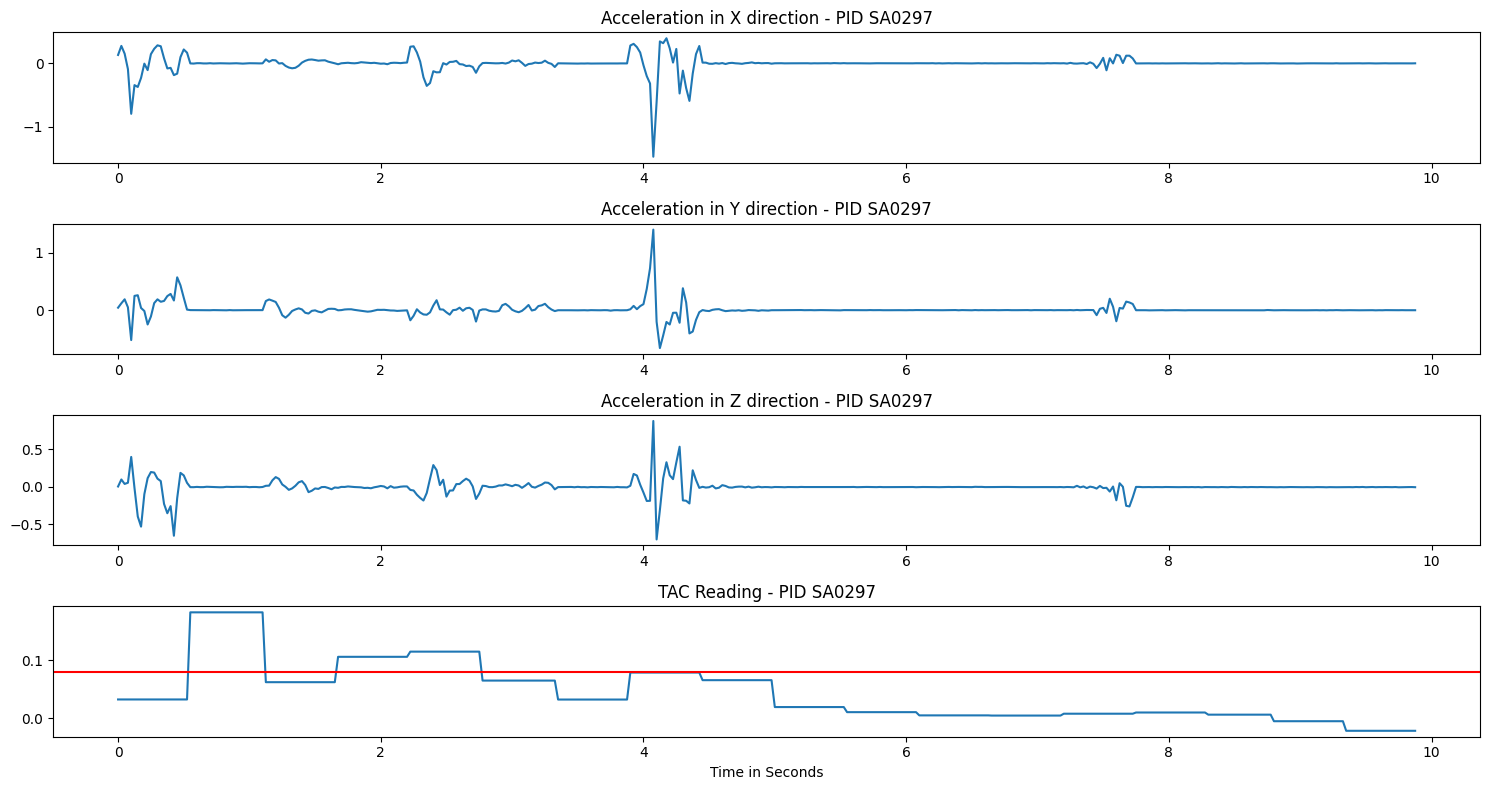

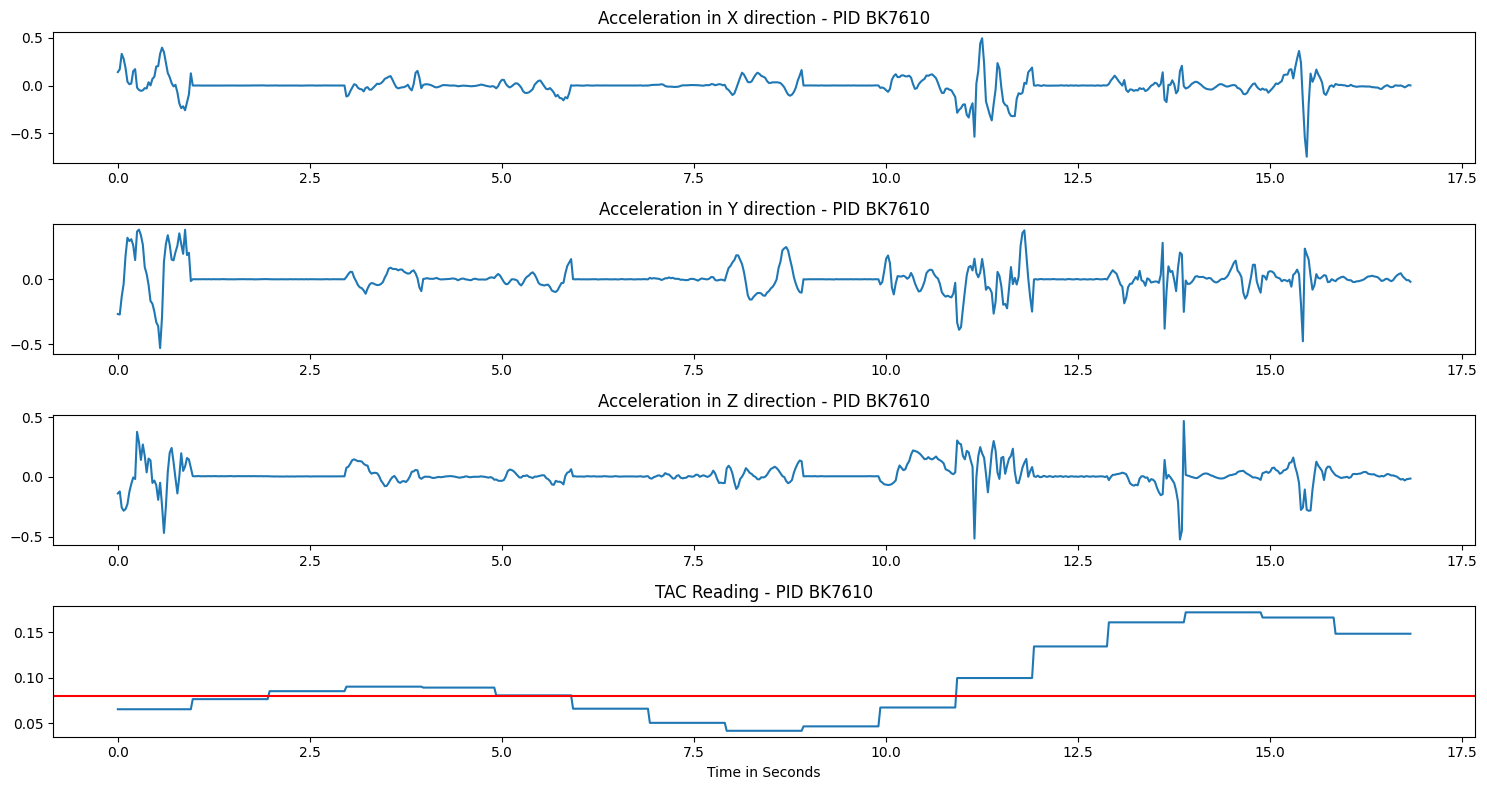

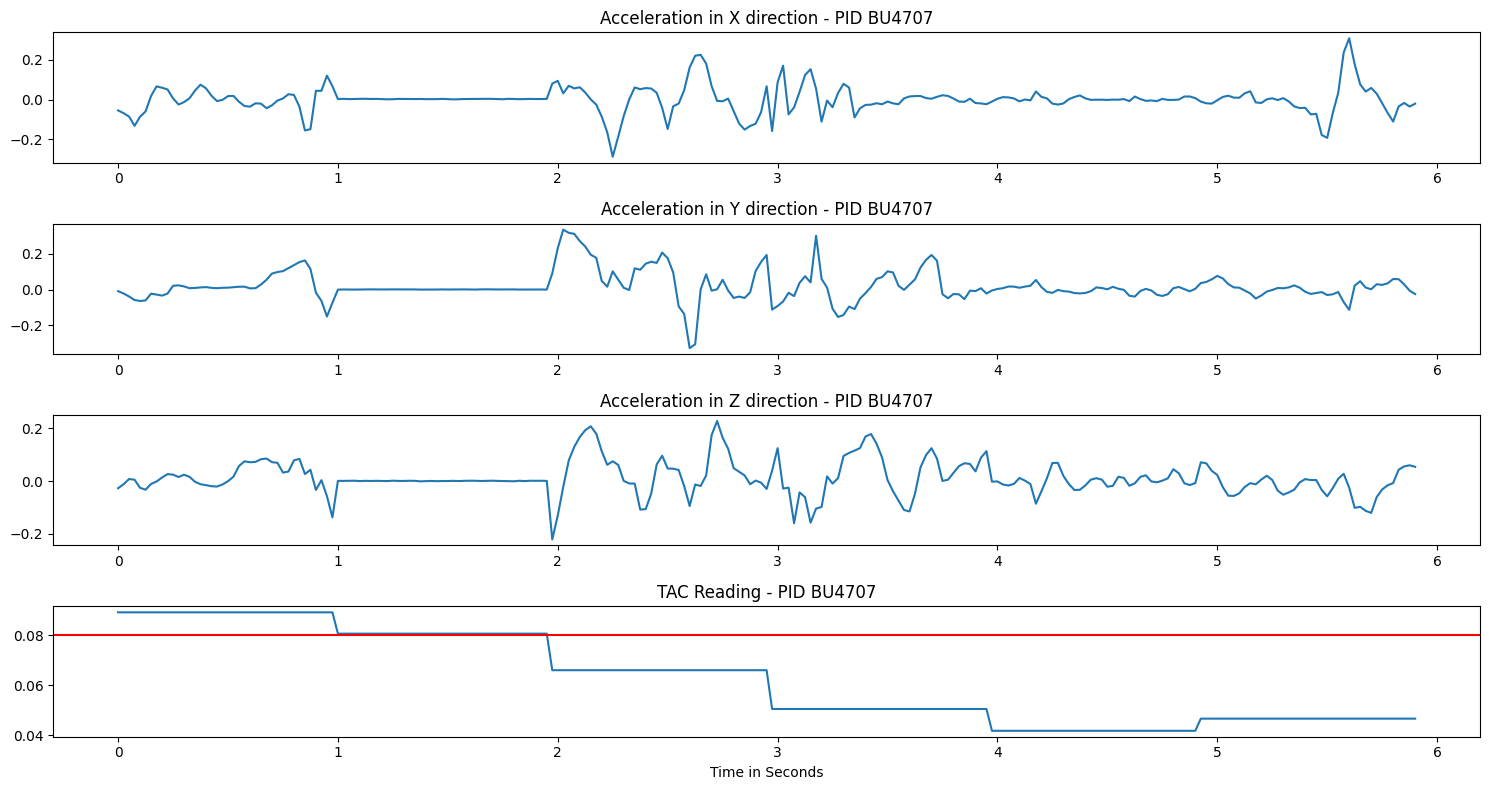

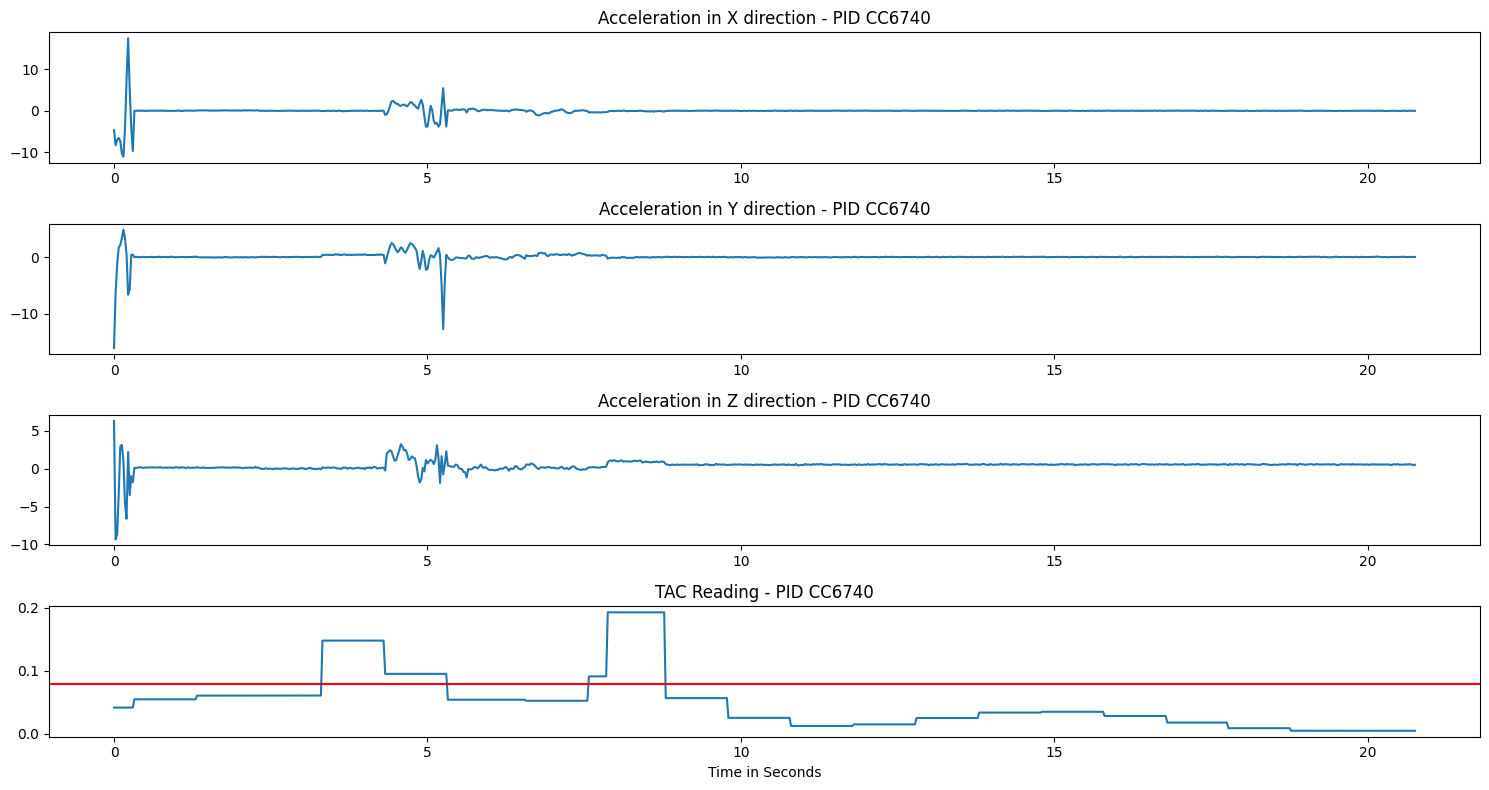

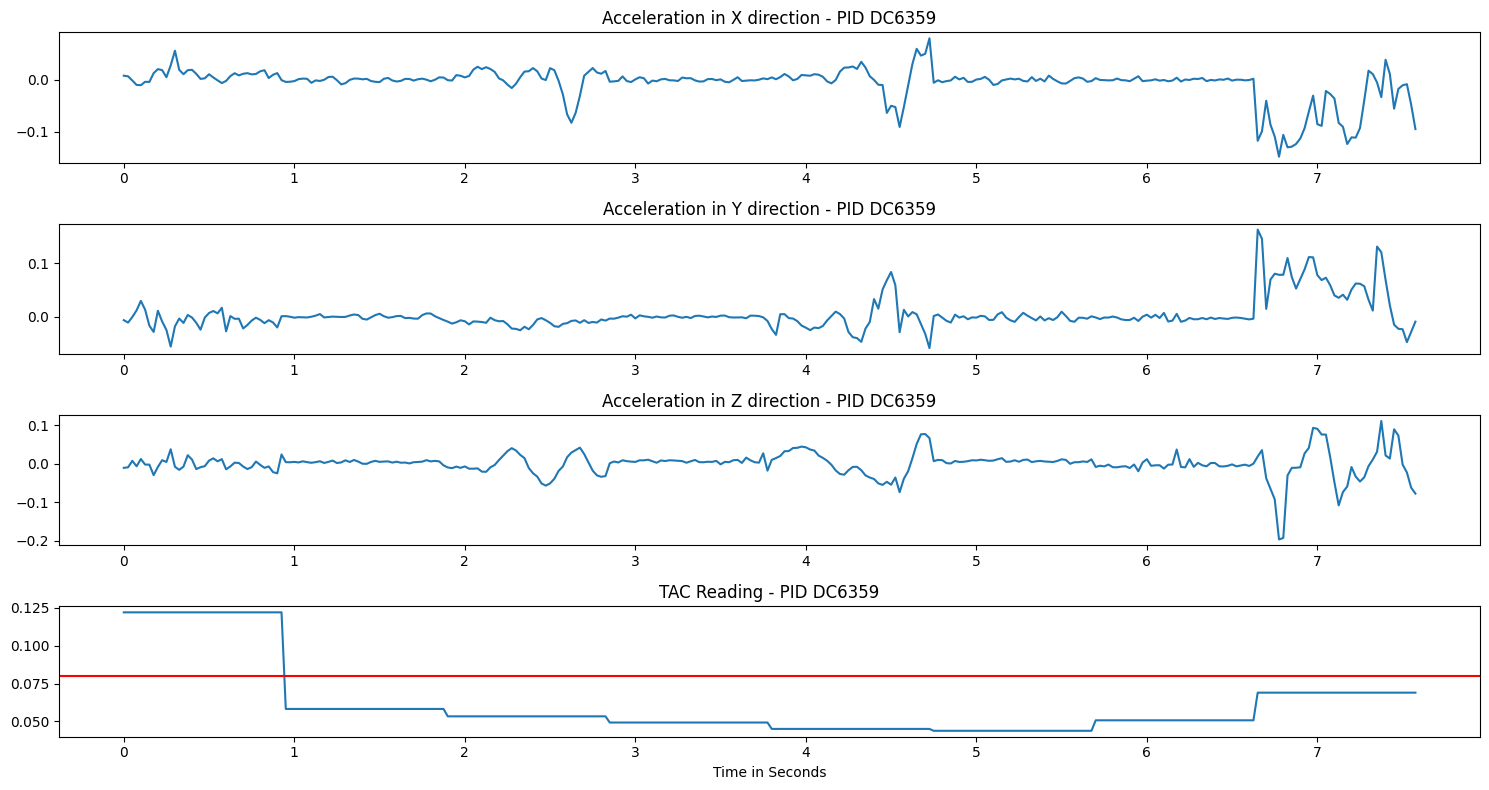

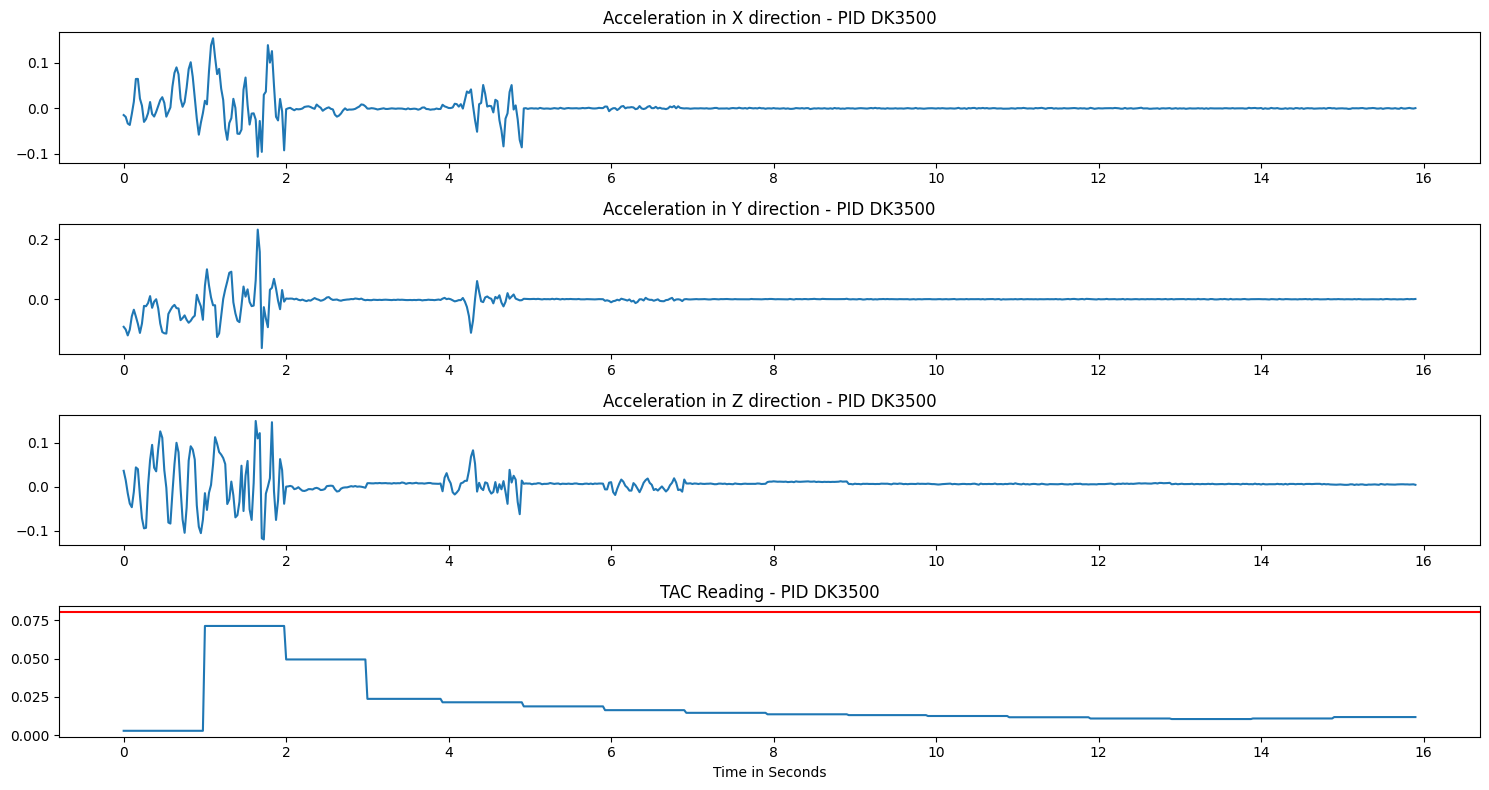

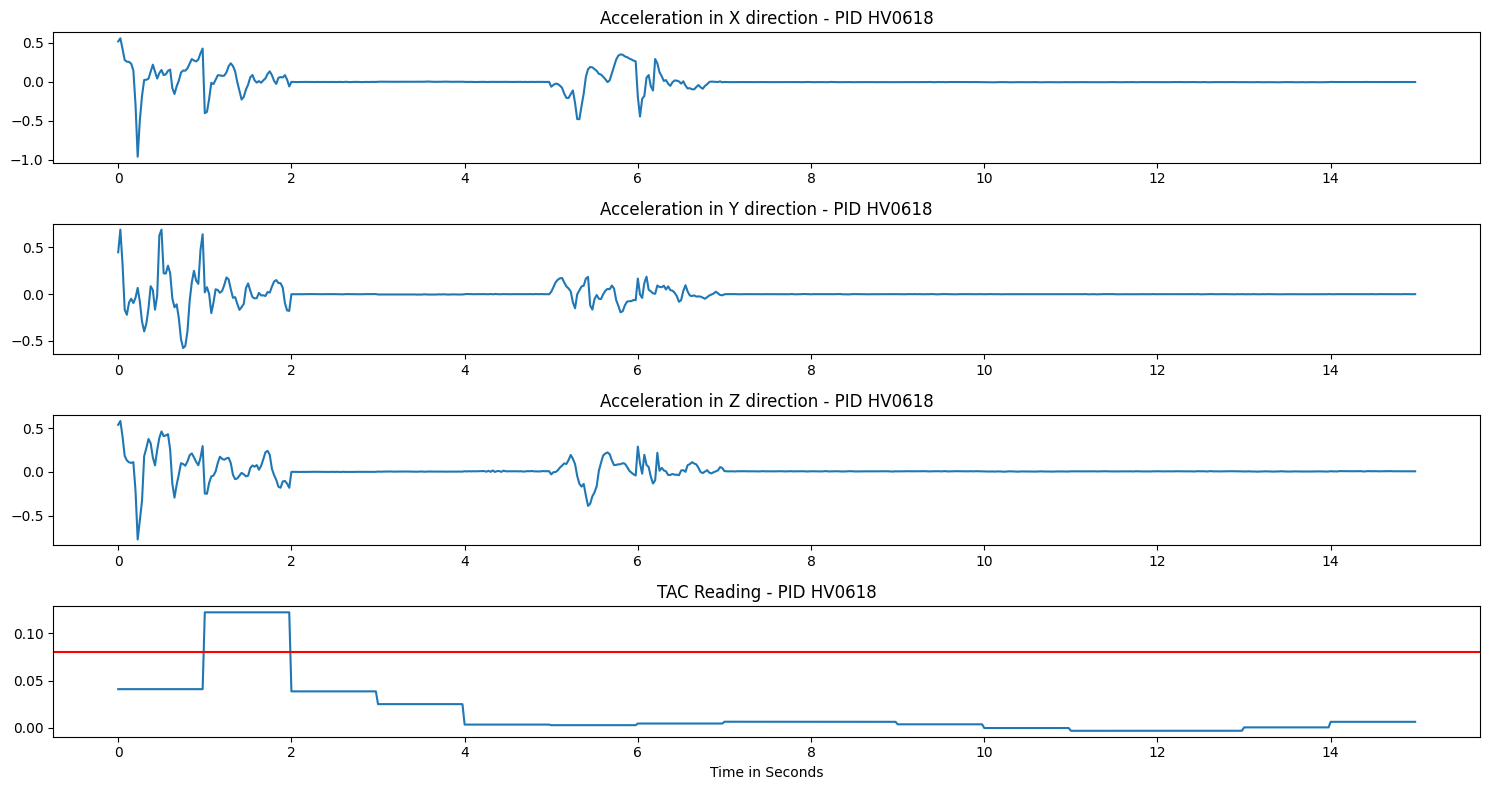

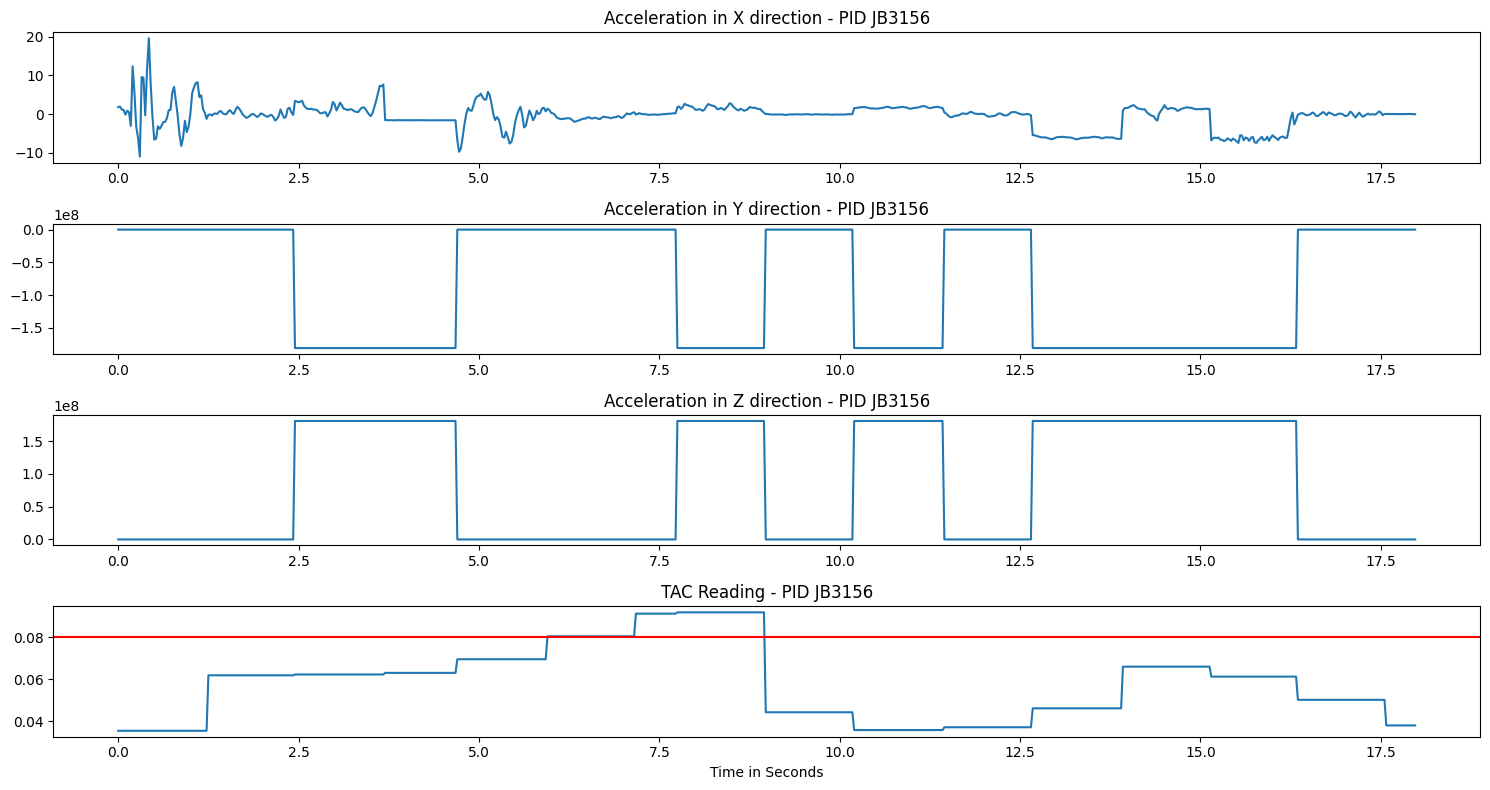

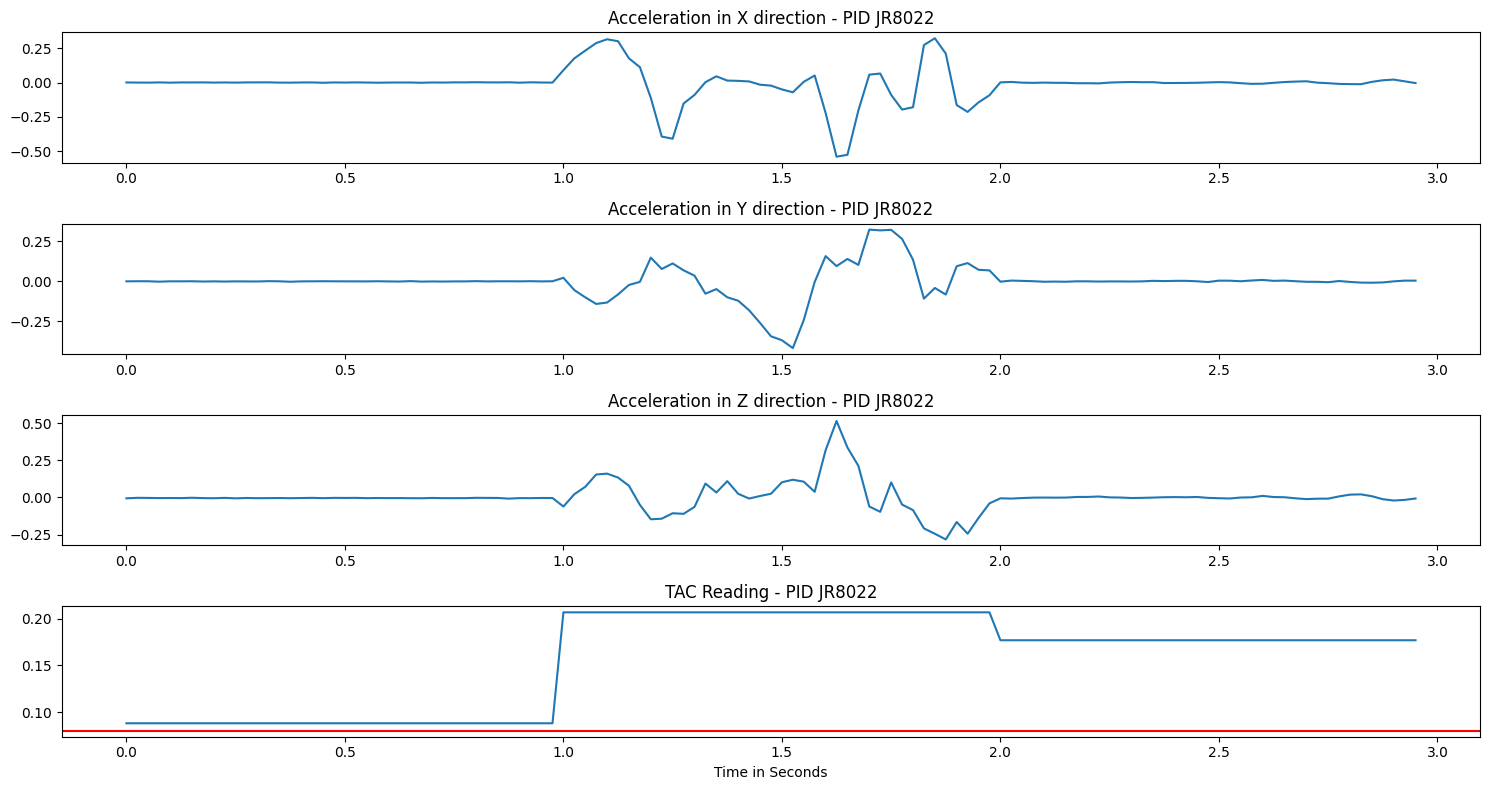

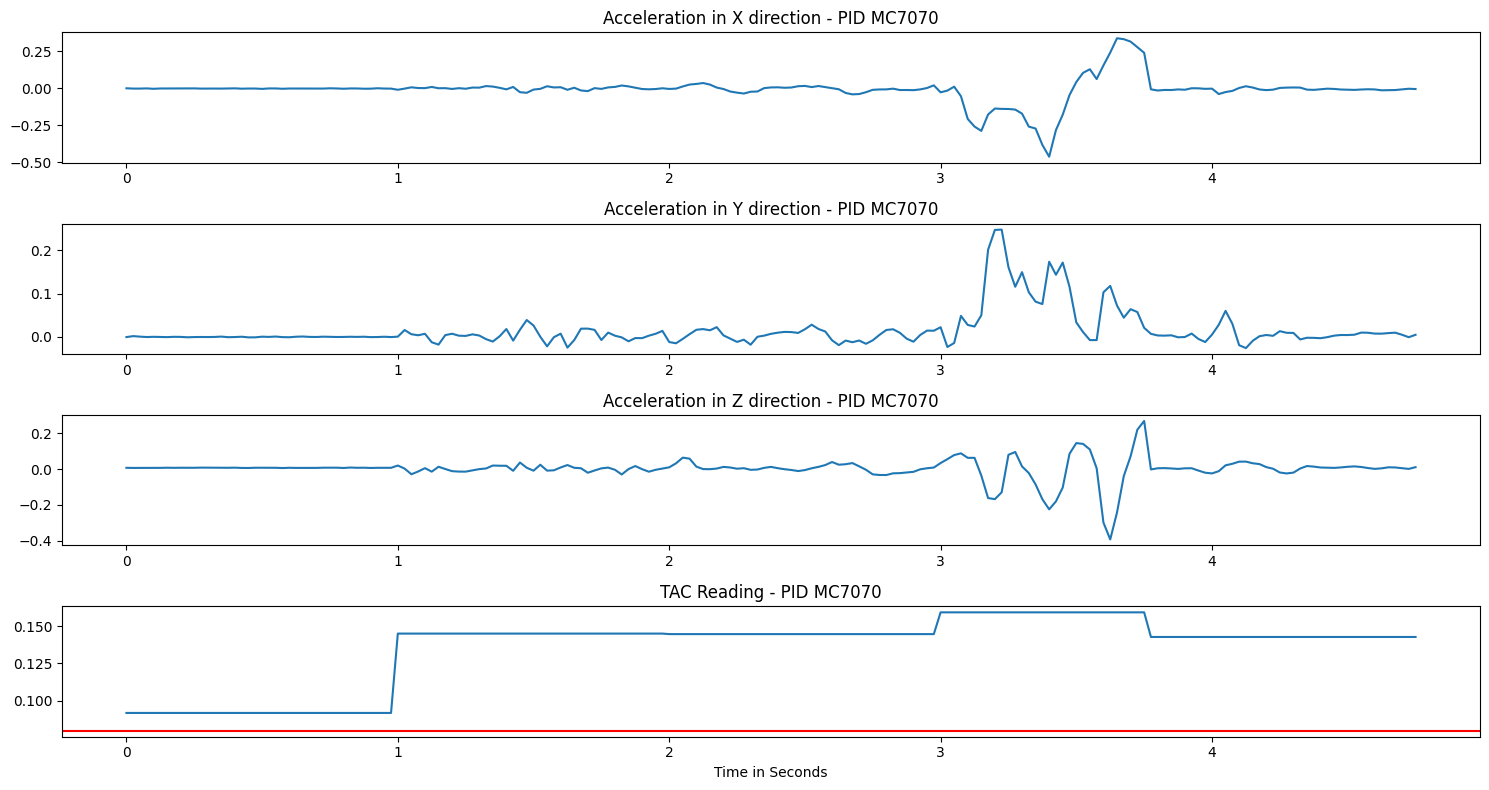

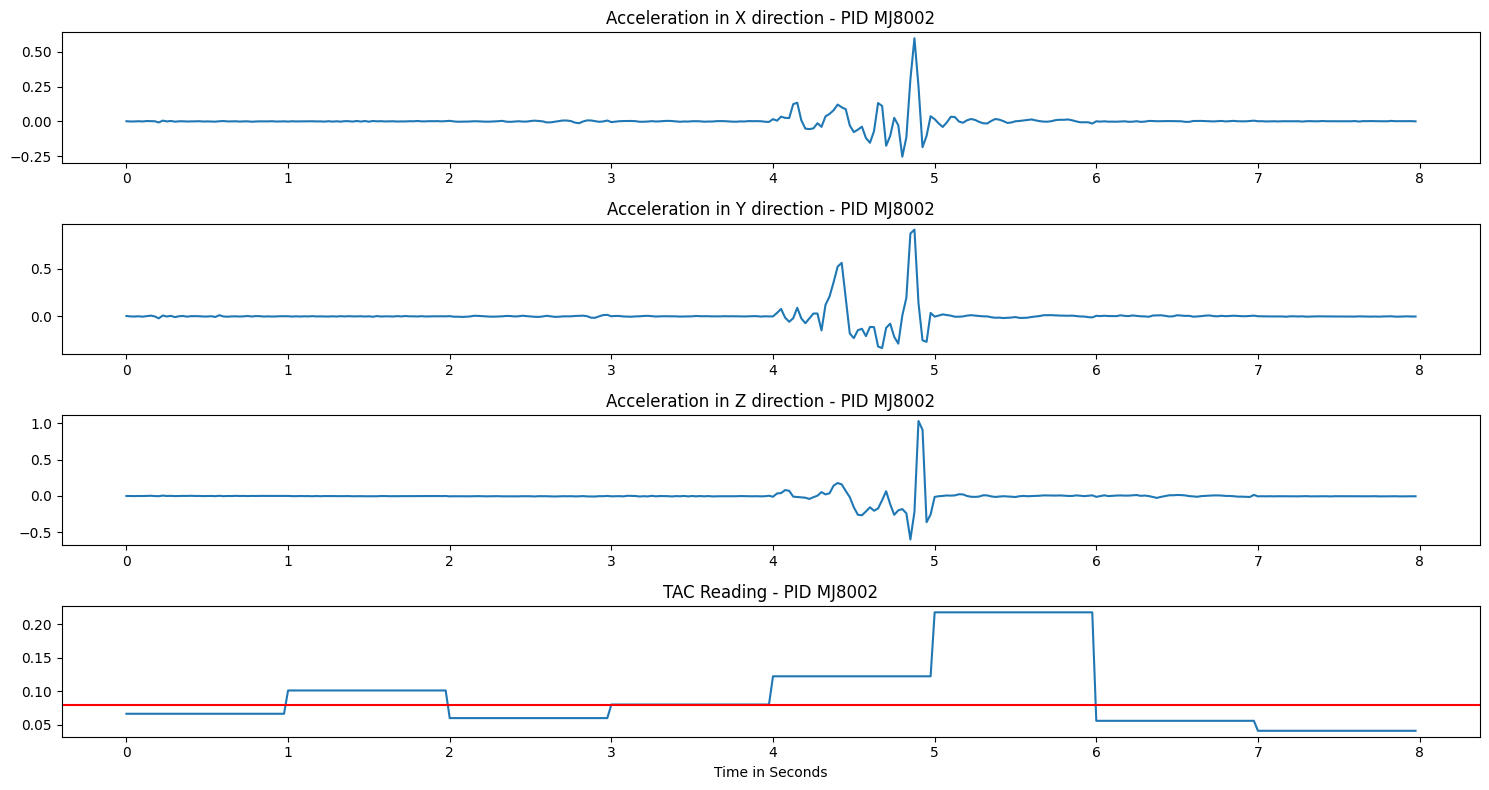

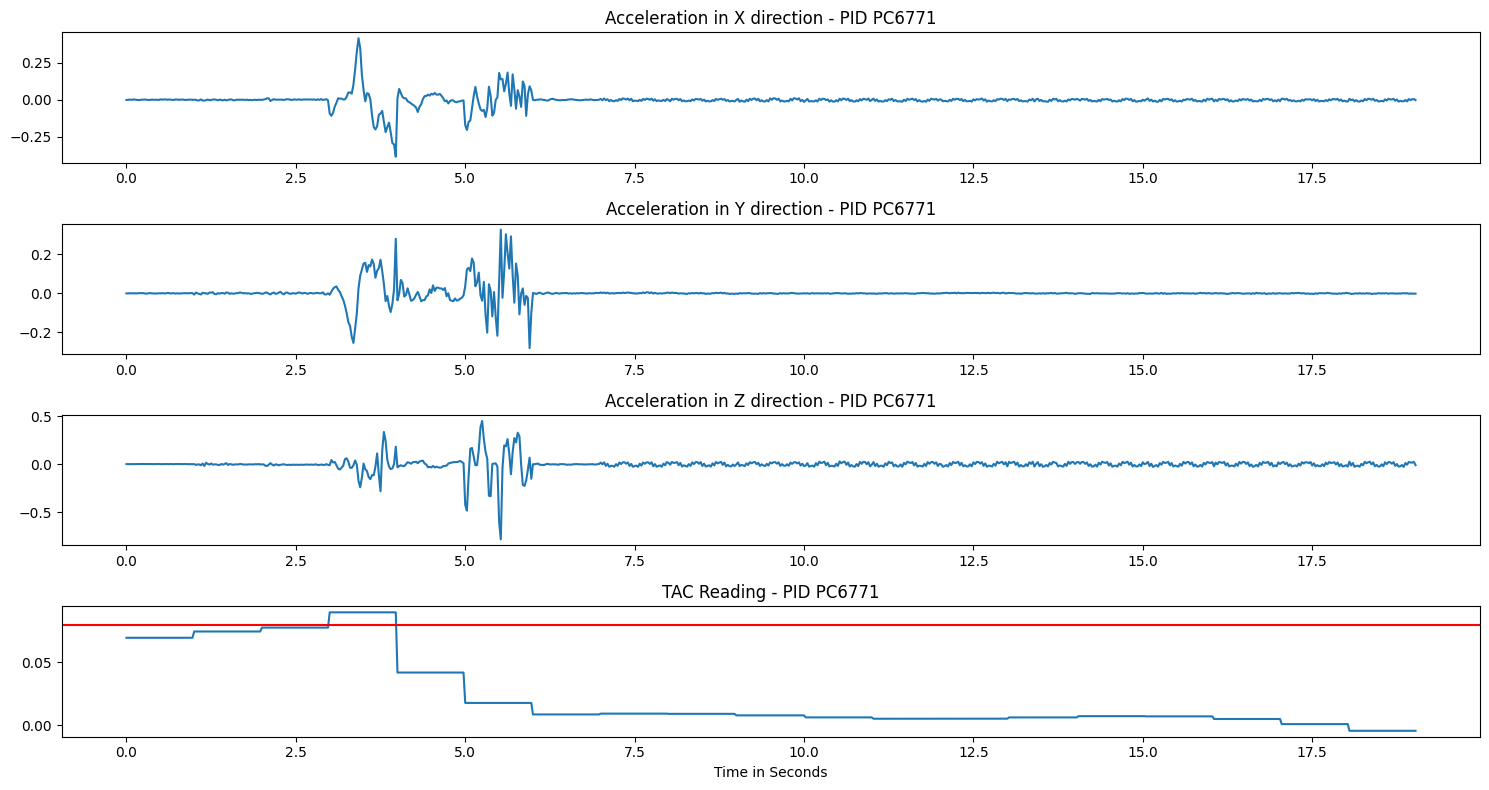

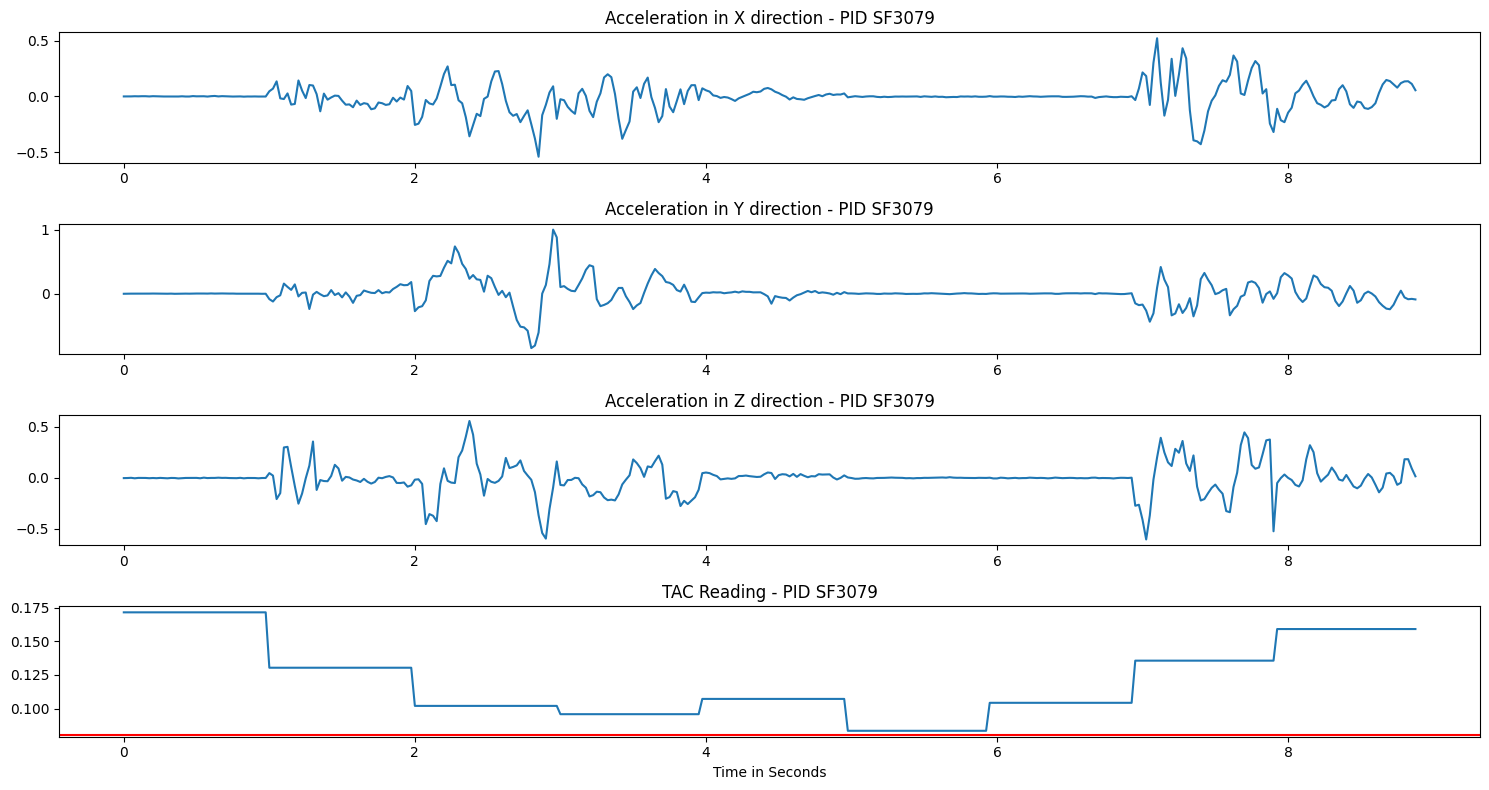

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Iterating over each PID and plotting sensor data
for pid in merged_data_dict:
    # Retrieve merged dataframe for the current PID
    merged_data_pid = merged_data_dict[pid]

# Part 2: Generating timestamp array

# In the research paper, the accelerometer data is collected at a frequency of 40 Hz,
# which means that there are 40 data points recorded per second.
# Therefore, to create an accurate timestamp array corresponding to the sensor data
# we divide the size of the 'x' column (number of data points) by 40.
# This division ensures that each timestamp in the array corresponds to the correct time interval
# between consecutive data points, allowing for accurate visualization and analysis of the sensor data.

    timestamp = np.arange(merged_data_pid['x'].size) / 40

# Part 3: Creating Subplots and Visualizing Sensor Data

# In this part, we create subplots to visualize the sensor data for each PID. Here's a breakdown of each step:

    # 1. Create Subplots:
    fig, ax = plt.subplots(4, figsize=(15, 8))

    # 2. Set common x-label
    plt.xlabel("Time in Seconds")

    # 3. Plot acceleration in x direction
    ax[0].plot(timestamp, "x", data=merged_data_pid)
    # Plot acceleration in y direction
    ax[1].plot(timestamp, "y", data=merged_data_pid)
    # Plot acceleration in z direction
    ax[2].plot(timestamp, "z", data=merged_data_pid)

    # 4. Plot TAC Reading
    ax[3].plot(timestamp, "TAC_Reading", data=merged_data_pid)
    ax[3].axhline(y=0.08, color='r', linestyle='-')

    # 5. Add subplot titles
    ax[0].set_title(f"Acceleration in X direction - PID {pid}")
    ax[1].set_title(f"Acceleration in Y direction - PID {pid}")
    ax[2].set_title(f"Acceleration in Z direction - PID {pid}")
    ax[3].set_title(f"TAC Reading - PID {pid}")

    # 6. Adjust layout
    plt.tight_layout()

    # 7. Show plot
    plt.show()


## Feature Engineering


### Definimg functions for entropy and complexity calculation


In [ ]:
def s_entropy(freq_list):
    '''
    This function computes the Shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing Shannon's entropy
    '''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return sh_entropy

def ordinal_patterns(ts, embdim, embdelay):
    '''
     This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 preferred range), embdelay = embedding delay
    OUTPUT: A numeric vector representing frequencies of ordinal patterns
    '''
    m, t = embdim, embdelay
    x = np.array(ts)
    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return s_entropy(p) / max_entropy

def complexity(op):
    '''
     This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entropy
    ARGS: ordinal pattern
    '''
    pe = p_entropy(op)
    constant1 = (0.5 + ((1 - 0.5) / len(op))) * np.log(0.5 + ((1 - 0.5) / len(op)))
    constant2 = ((1 - 0.5) / len(op)) * np.log((1 - 0.5) / len(op)) * (len(op) - 1)
    constant3 = 0.5 * np.log(len(op))
    Q_o = -1 / (constant1 + constant2 + constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5 * temp_op_prob) + (0.5 * (1 / len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return Comp_JS


In [ ]:
# Define a function to calculate permutation entropy and complexity
def calculate_entropy_and_complexity(df_segment, axis):
    op = ordinal_patterns(df_segment[axis], 3, 1)  # Assuming 'ordinal_patterns' function is defined
    pe = p_entropy(op)  # Assuming 'p_entropy' function is defined
    comp = complexity(op)  # Assuming 'complexity' function is defined
    return pe, comp


### Calculating Segment Start and End Indices



In this section, we perform feature engineering to define segment start and end indices based on changes in the TAC (Transdermal Alcohol Concentration) reading timestamp. Here's a detailed explanation of each step:

1. **Initialization:**
   - We initialize an empty dictionary `segment_start_indices_dict` to store segment start indices for each PID.

2. **Iterating Over PIDs:**
   - We iterate over each PID and its corresponding merged data dataframe in `merged_data_dict`.

3. **Finding Segment Start Indices:**
   - For each PID, we initialize a list `segment_start_indices` with an initial index value of 0, indicating the start of the first segment.
   - We then iterate through the rows of the merged data dataframe (`merged_data_pid`) to identify changes in the TAC readings.
   - If the TAC reading at the current row differs from the TAC reading at the previous row, it indicates the start of a new segment.
   - We append the index of the current row to `segment_start_indices` to mark the start of the new segment.

4. **Storing Segment Start Indices:**
   - Finally, we store the segment start indices list (`segment_start_indices`) in the `segment_start_indices_dict` dictionary with the PID as the key.

This feature engineering step helps in segmenting the data based on changes in alcohol concentration, allowing for the analysis of distinct periods of alcohol consumption or sobriety within each PID's data. These segment indices can be used for further analysis in finding the permutation entopy and complexity, or modeling tasks, such as studying the effects of alcohol on accelerometer readings during different time intervals.


In [ ]:
# Define the segment start and end indices based on changes in timestamp
segment_start_indices_dict = {}
for pid, merged_data_pid in merged_data_dict.items():
    segment_start_indices = [0]
    for i in range(1, len(merged_data_pid)):
        if merged_data_pid['TAC_Reading'].iloc[i] != merged_data_pid['TAC_Reading'].iloc[i-1]:
            segment_start_indices.append(i)
    segment_start_indices_dict[pid] = segment_start_indices


### **Calculation of Entropy and Complexity for Segments and Axes**

*Segments and Axes Explanation*

1. **Segments:**
   - Segments refer to distinct periods or intervals within the data that are separated based on certain criteria or conditions.
   - In this context, segments are defined based on changes in the TAC (Transdermal Alcohol Concentration) readings. Each segment represents a period of consistent TAC readings before a change occurs.

2. **Axes:**
   - Axes represent the different dimensions or directions in which data is measured or collected.
   - In the context of accelerometer data, the three axes typically represent the three spatial dimensions: x, y, and z.
   - The x-axis represents horizontal movement (side-to-side), the y-axis represents vertical movement (up-and-down), and the z-axis represents movement along the depth or forward-backward direction.
]

In this section, we calculate the permutation entropy (PE) and complexity for each segment and axis of the data for all PIDs. Here's a breakdown of the process:

1. **Initialization of Result Dictionaries:**
   - We initialize empty dictionaries `pe_results_dict` and `comp_results_dict` to store the permutation entropy and complexity results, respectively, for each PID.

2. **Iterating Over PIDs and Segments:**
   - We iterate over each PID and its corresponding merged data dataframe in `merged_data_dict`.
   - For each PID, we retrieve the segment start indices from the previously calculated `segment_start_indices_dict`.
   - We then iterate over the segment start indices to calculate entropy and complexity for each segment.
   
3. **Calculating Entropy and Complexity:**
   - For each segment, we extract the corresponding segment data from the merged dataframe.
   - We calculate the permutation entropy (PE) and complexity for each axis (x, y, z) using the `calculate_entropy_and_complexity` function.
   
4. **Storing Results:**
   - The calculated PE and complexity values for each axis are stored in dictionaries (`pe_results_pid` and `comp_results_pid`) with keys representing the axis names.
   - These results are appended to the respective lists for each axis in the dictionaries.
   
5. **Final Results Storage:**
   - After iterating over all segments for a PID, the results for that PID are stored in the `pe_results_dict` and `comp_results_dict` dictionaries with the PID as the key.

This process enables us to analyze the entropy and complexity of the accelerometer data within different segments, providing insights into the variability and complexity of the data over time for each PID.


In [ ]:
# Calculate entropy and complexity for each segment and axis for all PIDs
pe_results_dict = {}
comp_results_dict = {}
for pid, merged_data_pid in merged_data_dict.items():
    segment_start_indices = segment_start_indices_dict[pid]
    pe_results_pid = {'x': [], 'y': [], 'z': []}
    comp_results_pid = {'x': [], 'y': [], 'z': []}
    for i in range(1, len(segment_start_indices)):
        segment_start_index = segment_start_indices[i-1]
        segment_end_index = segment_start_indices[i]
        df_segment = merged_data_pid.iloc[segment_start_index:segment_end_index]

        # Calculate entropy and complexity for each axis
        pe_x, comp_x = calculate_entropy_and_complexity(df_segment, 'x')
        pe_y, comp_y = calculate_entropy_and_complexity(df_segment, 'y')
        pe_z, comp_z = calculate_entropy_and_complexity(df_segment, 'z')

        # Append results to respective lists
        pe_results_pid['x'].append(pe_x)
        pe_results_pid['y'].append(pe_y)
        pe_results_pid['z'].append(pe_z)
        comp_results_pid['x'].append(comp_x)
        comp_results_pid['y'].append(comp_y)
        comp_results_pid['z'].append(comp_z)

    pe_results_dict[pid] = pe_results_pid
    comp_results_dict[pid] = comp_results_pid


<ipython-input-223-7716c019969e>:45: RuntimeWarning: invalid value encountered in scalar divide
  return s_entropy(p) / max_entropy
<ipython-input-223-7716c019969e>:59: RuntimeWarning: divide by zero encountered in scalar divide
  Q_o = -1 / (constant1 + constant2 + constant3)
<ipython-input-223-7716c019969e>:64: RuntimeWarning: invalid value encountered in scalar multiply
  Comp_JS = Q_o * JSdivergence * pe


### Visualization of Permutation Entropy and Complexity

The following code segments generate visualizations for permutation entropy and complexity across different PIDs and axes.



#### Permutation Entropy Visualization:

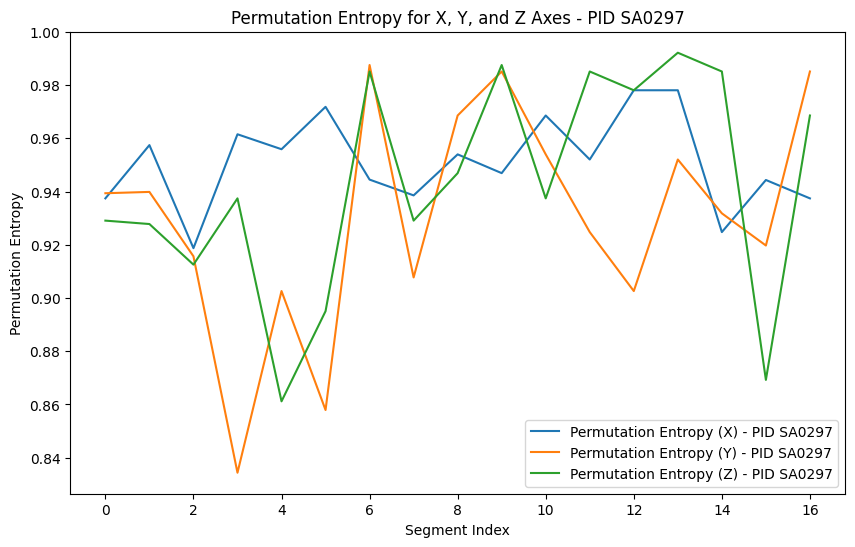

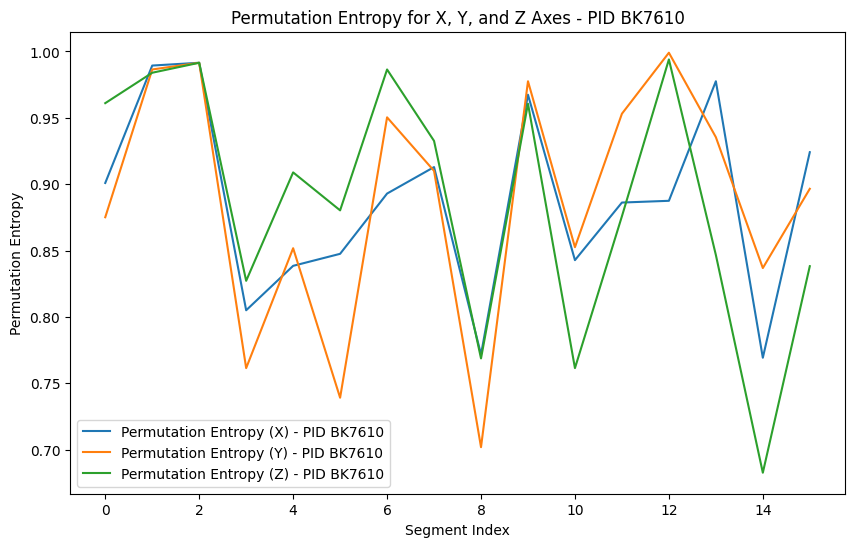

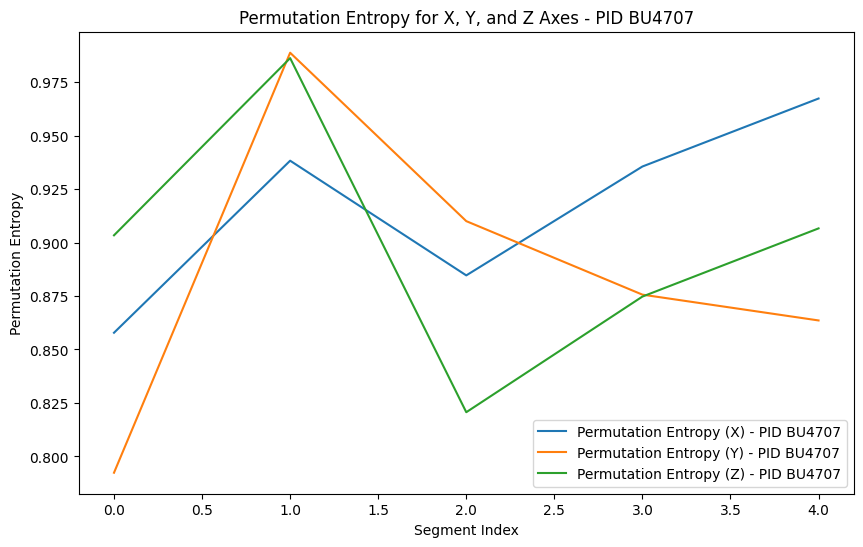

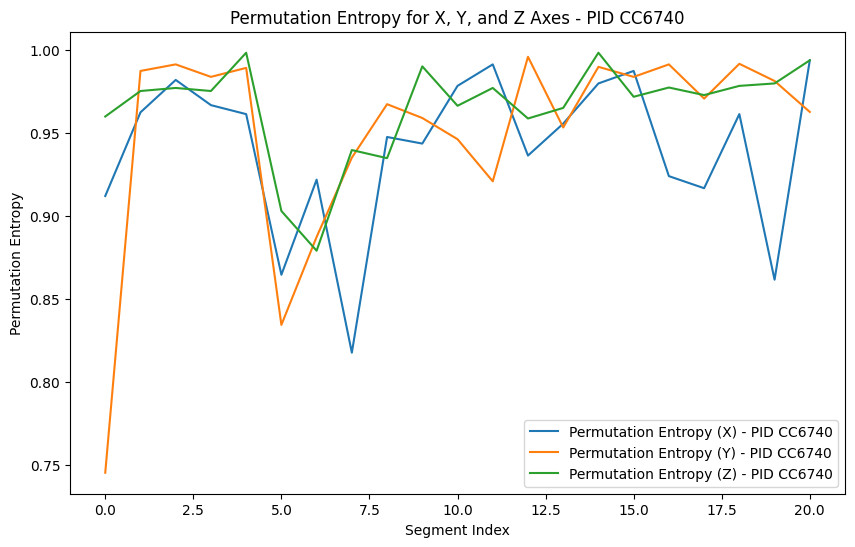

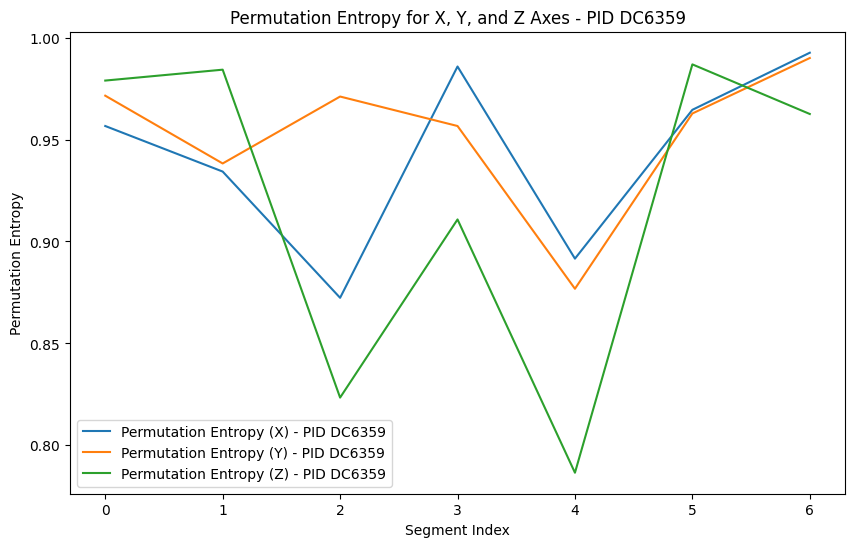

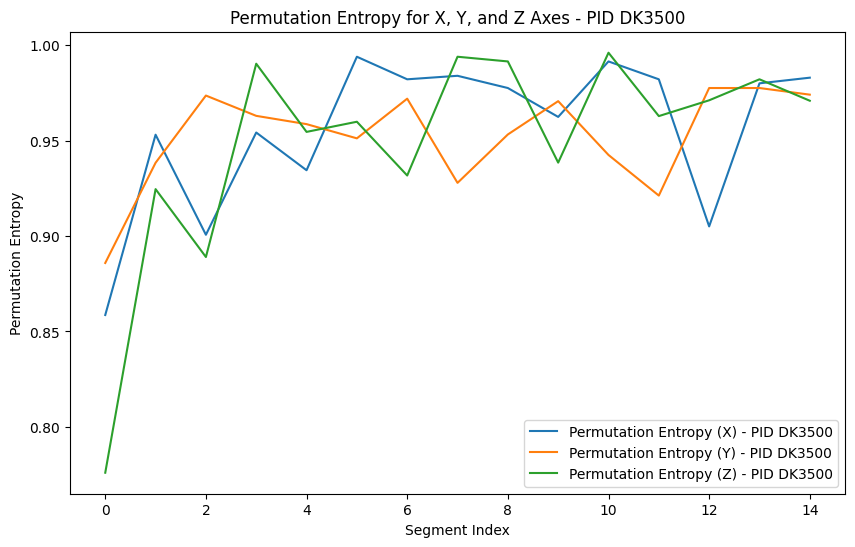

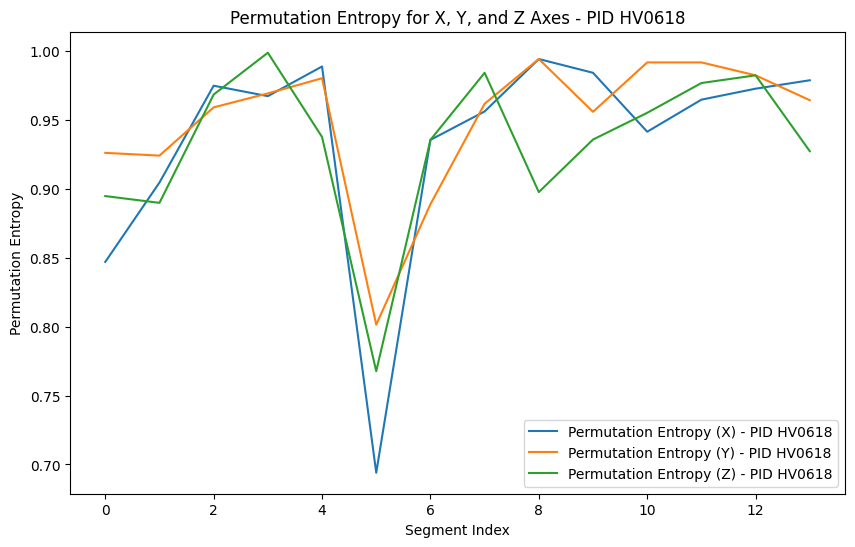

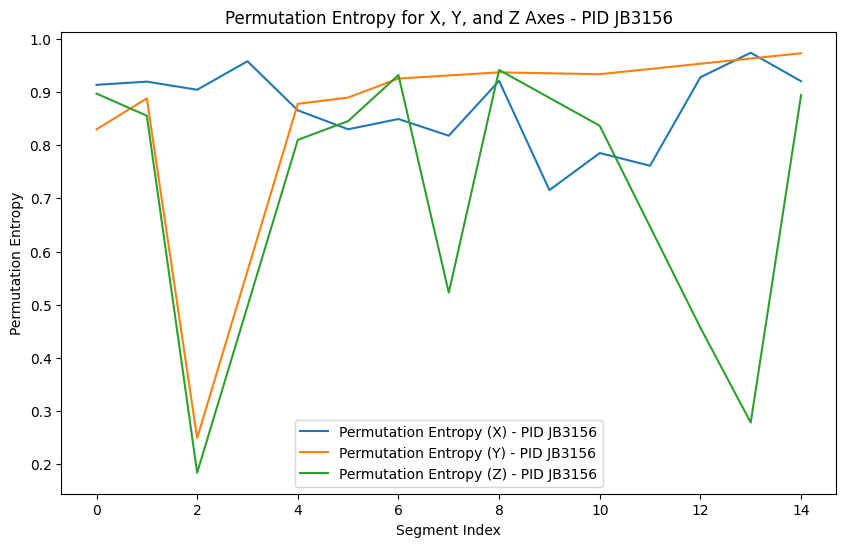

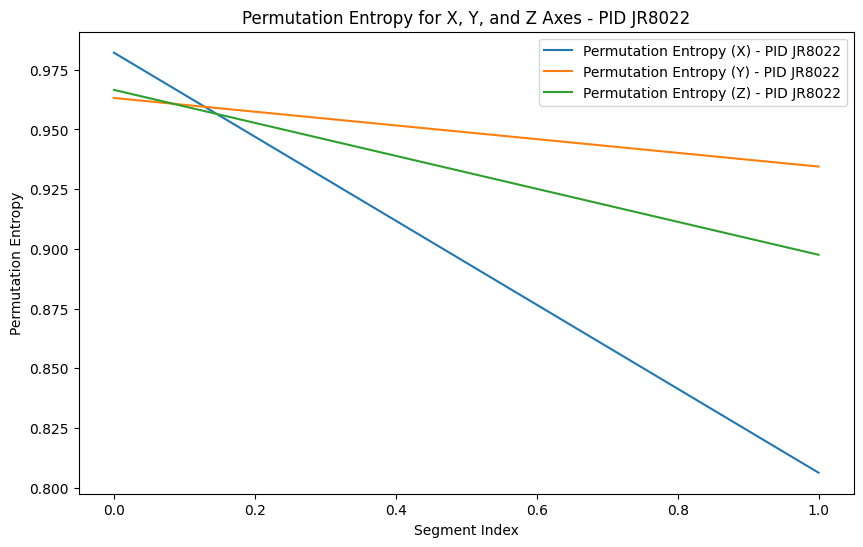

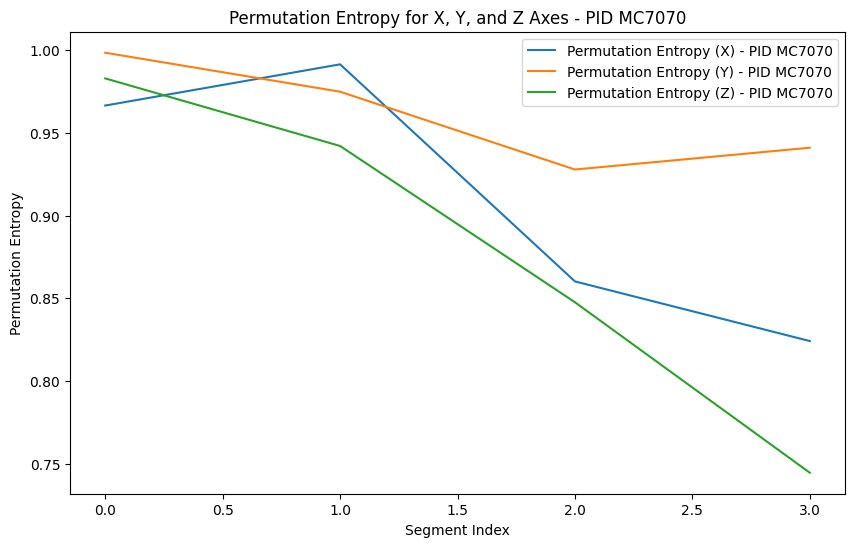

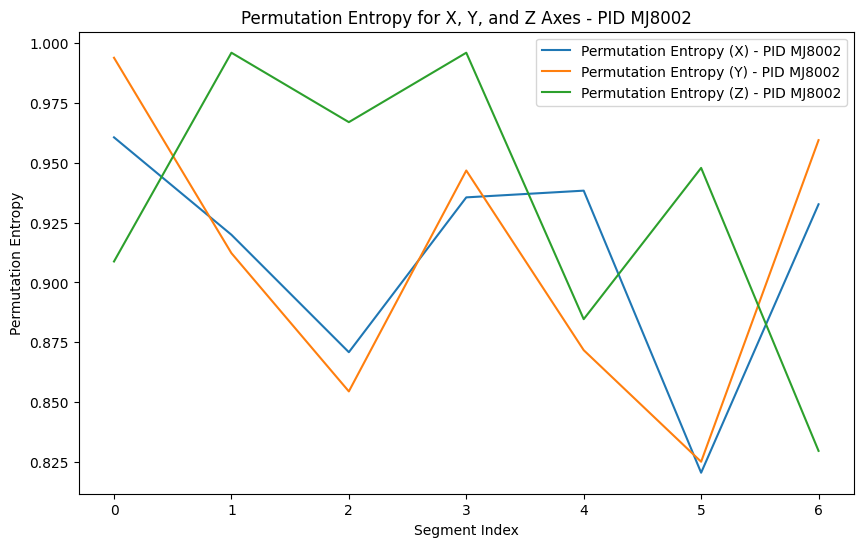

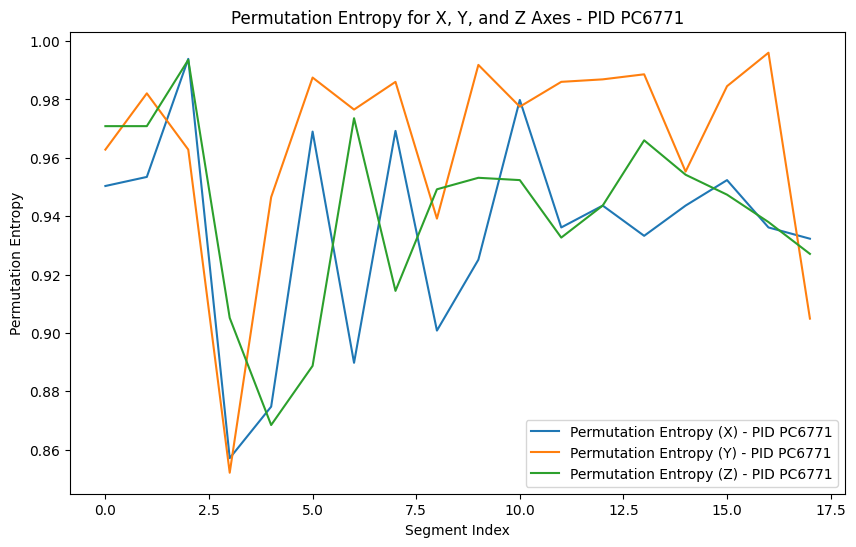

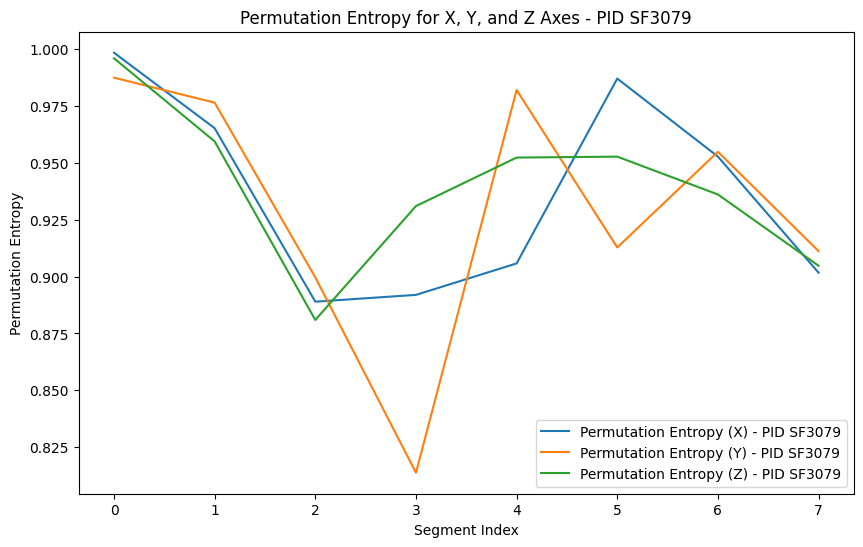

In [ ]:

for pid, pe_results_pid in pe_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pe_results_pid['x'], label=f'Permutation Entropy (X) - PID {pid}')
    sns.lineplot(data=pe_results_pid['y'], label=f'Permutation Entropy (Y) - PID {pid}')
    sns.lineplot(data=pe_results_pid['z'], label=f'Permutation Entropy (Z) - PID {pid}')
    plt.xlabel('Segment Index')
    plt.ylabel('Permutation Entropy')
    plt.title(f'Permutation Entropy for X, Y, and Z Axes - PID {pid}')
    plt.legend()
    plt.show()


### Complexity Visualization:


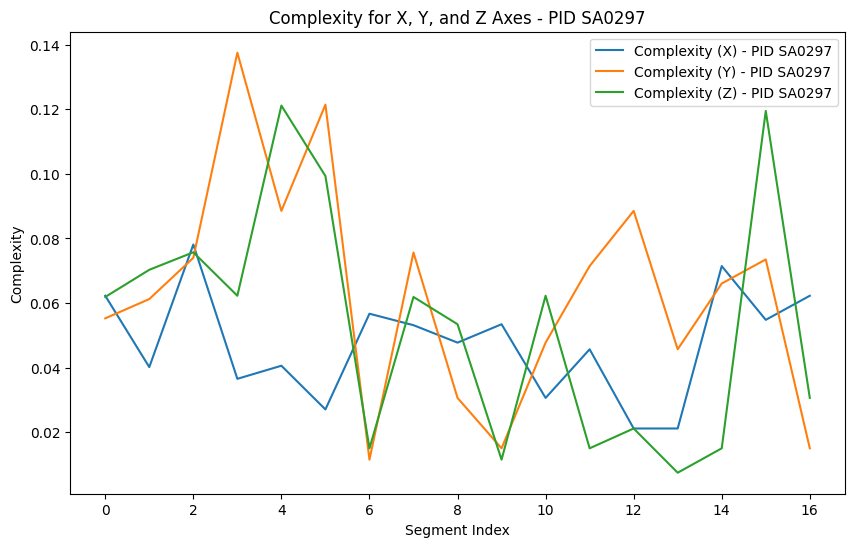

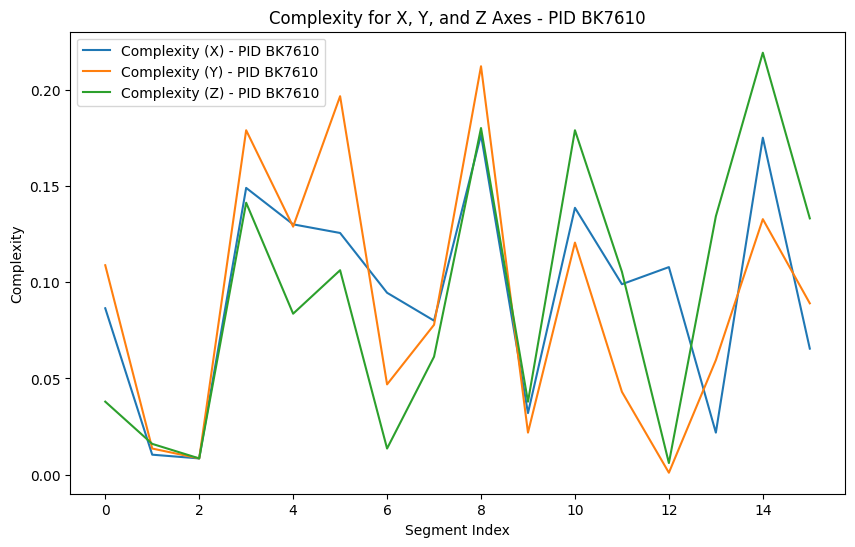

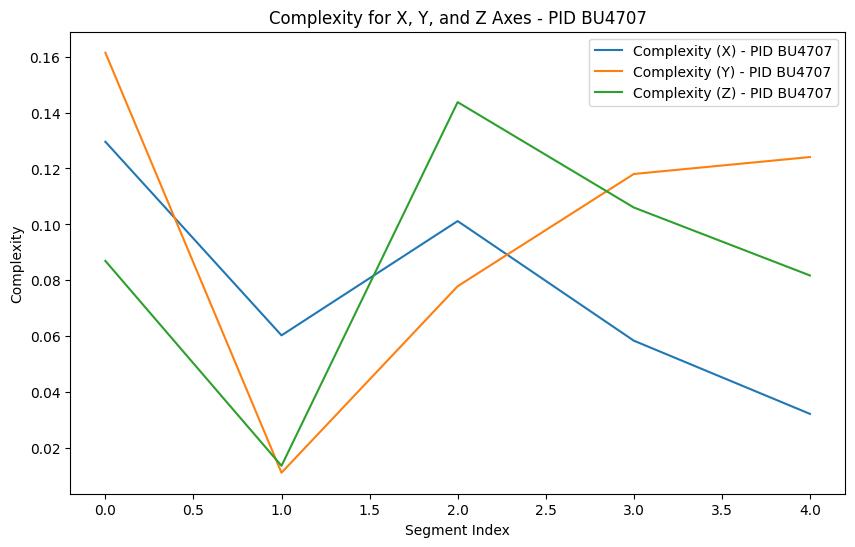

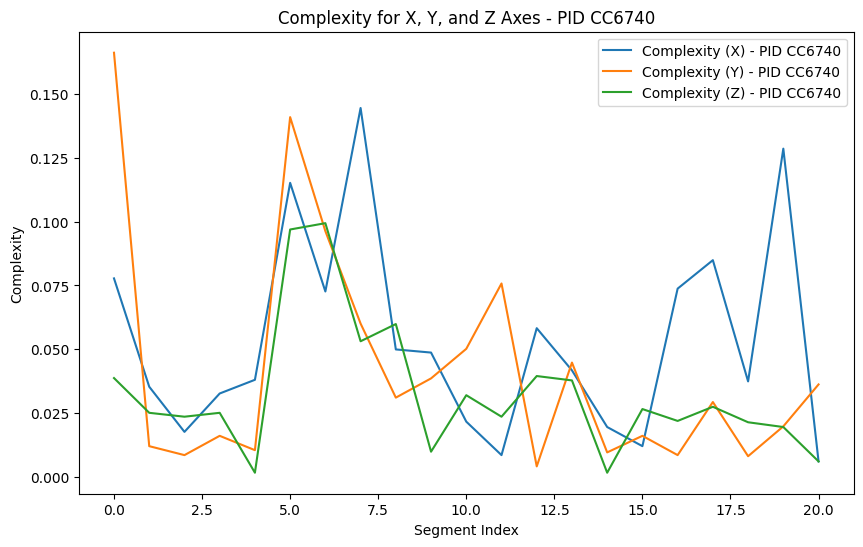

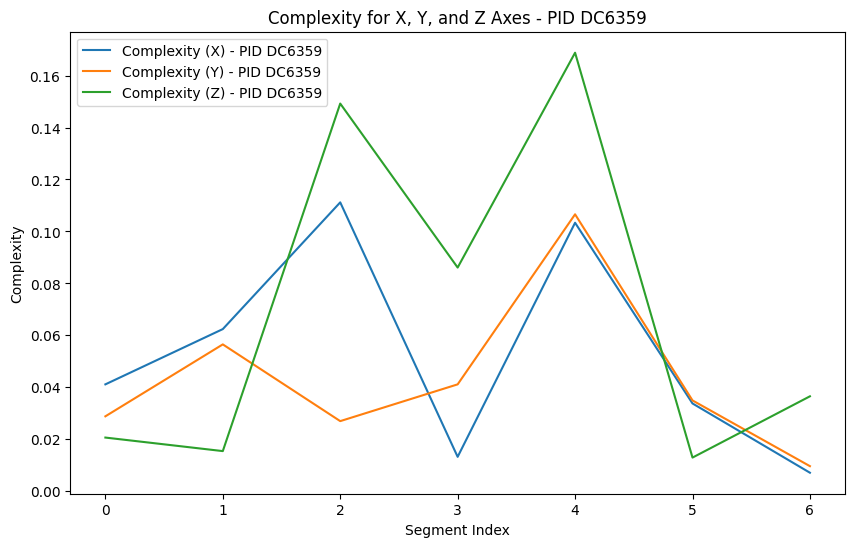

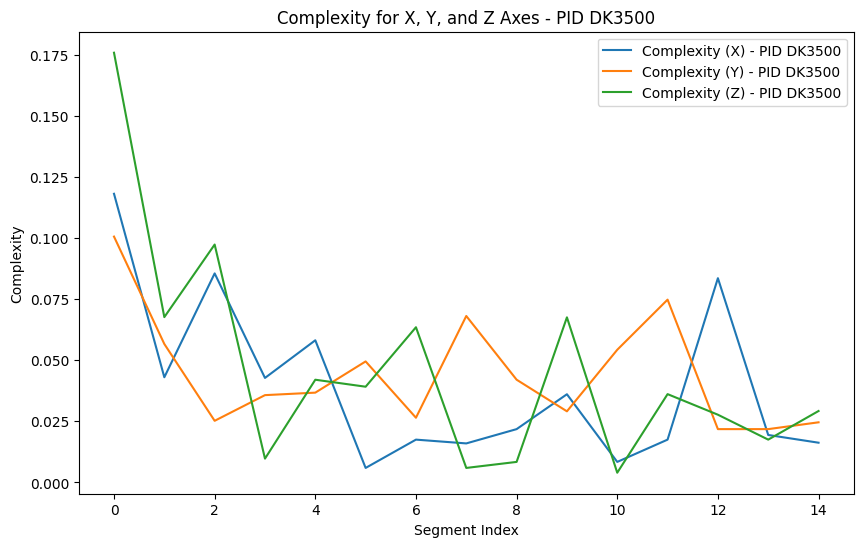

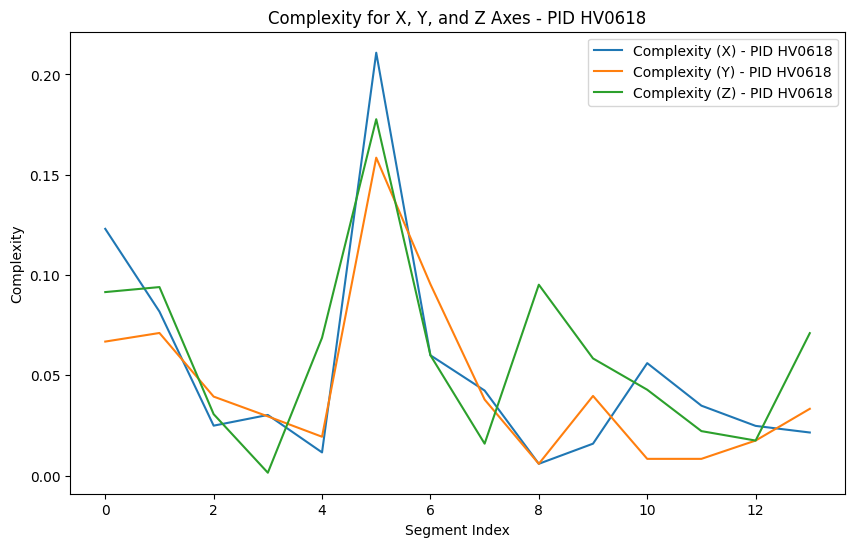

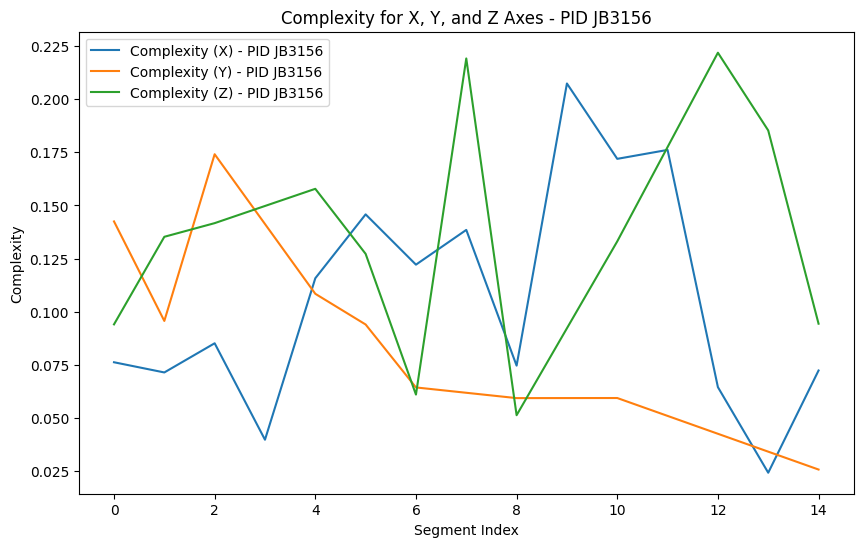

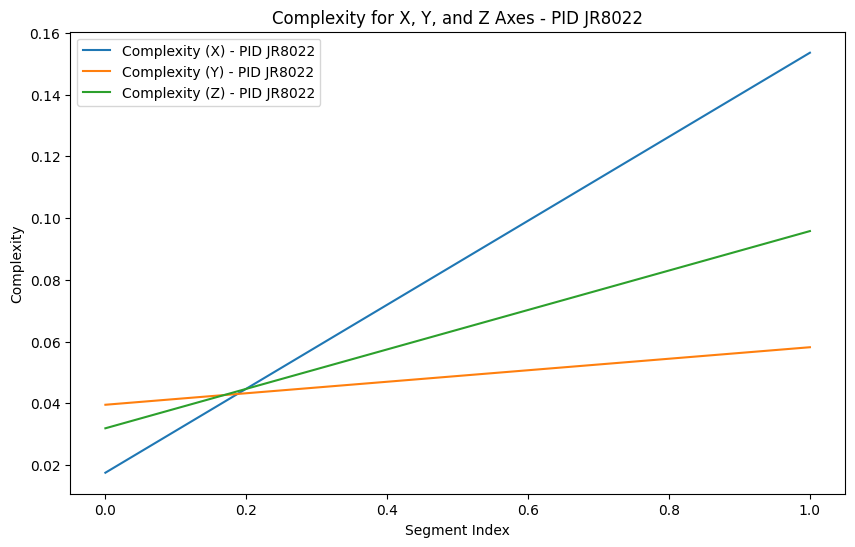

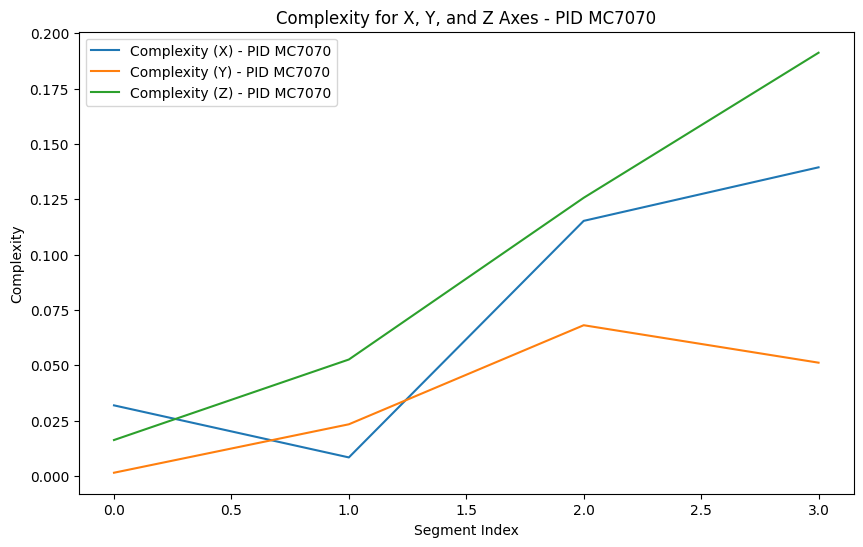

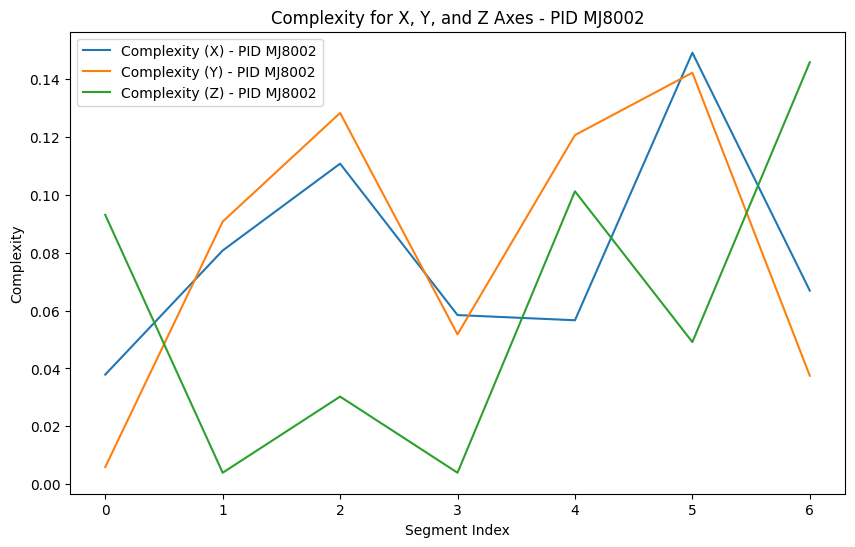

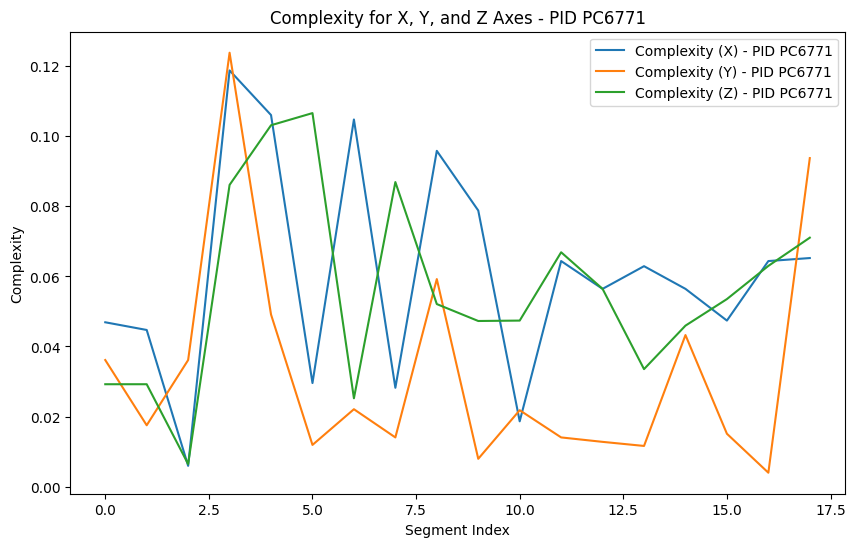

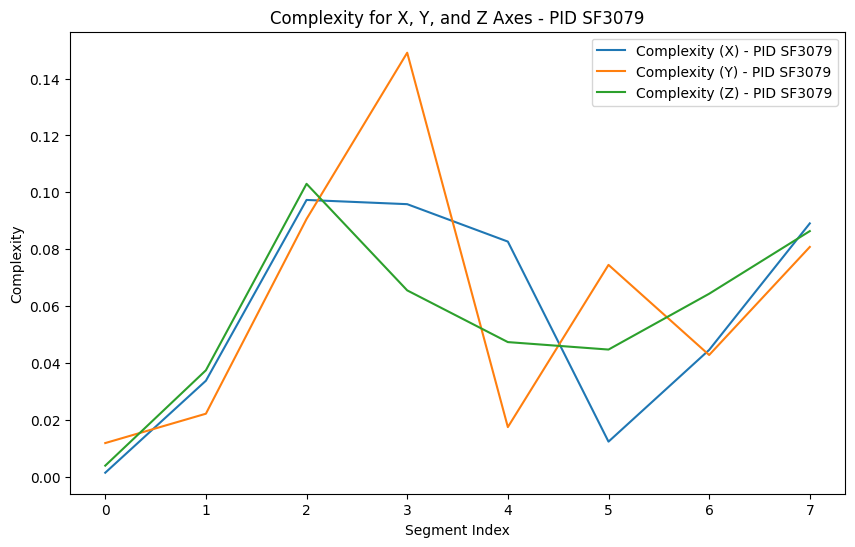

In [ ]:
for pid, comp_results_pid in comp_results_dict.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=comp_results_pid['x'], label=f'Complexity (X) - PID {pid}')
    sns.lineplot(data=comp_results_pid['y'], label=f'Complexity (Y) - PID {pid}')
    sns.lineplot(data=comp_results_pid['z'], label=f'Complexity (Z) - PID {pid}')
    plt.xlabel('Segment Index')
    plt.ylabel('Complexity')
    plt.title(f'Complexity for X, Y, and Z Axes - PID {pid}')
    plt.legend()
    plt.show()


### Permutation Entropy Analysis

The permutation entropy graphs visualize the entropy values for each segment and axis across different PIDs. Here's an overview of the analysis:

**Range of Permutation Entropy:**
- Permutation entropy values fall between 0 and 1 for all axes and PIDs.

**Interpretation of Entropy Values:**
- When the entropy value is close to 1, it means the data shows higher disorder or complexity in movement patterns.
- Conversely, when the entropy value is nearer to 0, it suggests the presence of more regular or predictable movement patterns.


### Complexity Analysis

The complexity graphs illustrate the complexity values for each segment and axis across different PIDs. Here's a summary of the analysis:

**Variation in Complexity Values:**
- Complexity values exhibit a range across different axes and PIDs

**Understanding Complexity Values:**
- Higher complexity values indicate the presence of more complex movement patterns, reflecting increased variability and unpredictability in accelerometer data.
- Lower complexity values signify simpler movement patterns, implying more regular or repetitive behavior.

### Overall Trends:

**Permutation Entropy Trends:**
- Permutation entropy tends to be relatively high across all PIDs and axes, indicating a significant level of variability and complexity in movement patterns.

**Complexity Trends:**
- Complexity values display considerable variation, suggesting that movement patterns encompass a mix of both regular and irregular behavior.

**Segment-Specific Patterns:**
- Certain segments of the data may demonstrate notably high or low levels of entropy and complexity, signaling periods of either more diverse or less varied movement.

## Baseline Model Building


###Data Preparation for Model


In [ ]:
#First i have concatenated the data from all PIDs into a single dataframe named `model_concated_df`.

model_concated_df = pd.concat(merged_data_dict.values(), ignore_index=True)
model_concated_df.head()

timestamp  TAC_Reading     pid       x       y       z
0  1493734448     0.032672  SA0297  0.1312  0.0432  0.0034
1  1493734448     0.032672  SA0297  0.2734  0.1197  0.0968
2  1493734448     0.032672  SA0297  0.1514  0.1886  0.0375
3  1493734448     0.032672  SA0297 -0.0914  0.0496  0.0534
4  1493734448     0.032672  SA0297 -0.7935 -0.5184  0.3967

In [ ]:
#model_concated_df['pid'].value_counts(normalize=True)

In [ ]:
model_concated_df.head()

timestamp  TAC_Reading     pid       x       y       z
0  1493734448     0.032672  SA0297  0.1312  0.0432  0.0034
1  1493734448     0.032672  SA0297  0.2734  0.1197  0.0968
2  1493734448     0.032672  SA0297  0.1514  0.1886  0.0375
3  1493734448     0.032672  SA0297 -0.0914  0.0496  0.0534
4  1493734448     0.032672  SA0297 -0.7935 -0.5184  0.3967

In [ ]:
model_concated_df['TAC_Reading'].nunique()

156

In [ ]:
# Target Setting
# I set the target variable Target based on the Transdermal Alcohol Concentration (TAC) readings.
# If the TAC reading is greater than 0.08, the target is set to 1 (Drunk), otherwise, it's set to 0 (Sober).

model_concated_df['Target'] = np.where(model_concated_df['TAC_Reading']>0.08,1,0)

In [ ]:
model_concated_df['Target'].value_counts(normalize=True)

Target
0    0.717748
1    0.282252
Name: proportion, dtype: float64

In [ ]:
# model_concated_df[model_concated_df['TAC_Reading']>0.08]
model_concated_df.head()

timestamp  TAC_Reading     pid       x       y       z  Target
0  1493734448     0.032672  SA0297  0.1312  0.0432  0.0034       0
1  1493734448     0.032672  SA0297  0.2734  0.1197  0.0968       0
2  1493734448     0.032672  SA0297  0.1514  0.1886  0.0375       0
3  1493734448     0.032672  SA0297 -0.0914  0.0496  0.0534       0
4  1493734448     0.032672  SA0297 -0.7935 -0.5184  0.3967       0

In [ ]:
model_concated_df.shape

(6147, 7)

### Model Training and Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Train-Test Split
# I have split the data into training and testing sets.
# Features (X) include accelerometer data (x, y, z), and the target variable (y) is the 'Target' column.


X = model_concated_df.drop(columns=['timestamp','pid','TAC_Reading','Target'])  # Dropping unnecesary columns such as timestamp, pid, TAc, target
y = model_concated_df['Target'] # Assigning Target in y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Let's  split data into train and test with proportion of 70:30
print("X_train_Shape:", X_train.shape)
print("X_test_Shape:", X_test.shape)
print("y_train_Shape:", y_train.shape)
print("y_test_Shape:", y_test.shape)

## X_train contains: x,y,z
## y_train contains target

X_train_Shape: (4302, 3)
X_test_Shape: (1845, 3)
y_train_Shape: (4302,)
y_test_Shape: (1845,)


### Random Forest Classifier

In [ ]:
# Model Training
# Here i have loaded a Random Forest Classifier and haven't applied any hyperparameter tuning , keeping it simple just to get a base model performance
model = RandomForestClassifier(n_estimators=500, random_state=42)


In [ ]:
# Model Evaluation

# Here i am fitting the model to training data
model.fit(X_train, y_train)

# Predictinfg on the test set
y_pred = model.predict(X_test)

# evaluating the model's performance on the test set by predicting labels and calculating accuracy.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7447154471544716


In [ ]:
 # creating new dataframe result_df and storing X_test (features) into the results DataFrame
results_df = pd.DataFrame(X_test)

# Adding the actual labels
results_df['Actual'] = y_test

# Adding the predicted labels
results_df['Predicted'] = y_pred

# Predict_proba will give us probabiloities associated with each prediction
y_pred_proba = model.predict_proba(X_test)

# Adding the probabilities for each class
for i, class_name in enumerate(model.classes_):
    results_df[f'Probability_{class_name}'] = y_pred_proba[:, i]

In [ ]:
results_df.head(10).reset_index(drop=True)

x             y             z  Actual  Predicted  Probability_0  \
0 -0.011200 -2.200000e-03 -2.540000e-02       0          0          0.964   
1 -0.004500 -1.500000e-03  9.400000e-03       0          0          0.986   
2  0.001200 -4.200000e-03  3.200000e-03       0          0          0.974   
3 -0.001200 -1.000000e-04  6.500000e-03       0          0          1.000   
4 -0.086300  2.300000e-02  2.120000e-02       1          1          0.344   
5  1.198298 -1.809008e+08  1.809008e+08       1          1          0.068   
6 -0.002800 -4.000000e-04  1.570000e-02       0          0          0.848   
7  0.508302  6.043327e+00  8.972879e+00       0          0          0.966   
8 -0.287441 -3.324346e-01 -7.239633e-01       0          0          0.948   
9 -0.027800  9.380000e-02  1.761000e-01       0          0          0.782   

   Probability_1  
0          0.036  
1          0.014  
2          0.026  
3          0.000  
4          0.656  
5          0.932  
6          0.152  
7          0.034  
8          0.052  
9          0.218

**Result Interpretation:** Here we can see 2 new columns in our dataframe which basically denotes a probability associated with class 0 and class 1
for example: index(4) reuslts shows that Actual value was 1 and predicted value is 1 and Probability of getting class 1 is 0.656

### Model Evaluation: Classification Report



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1300
           1       0.59      0.46      0.52       545

    accuracy                           0.74      1845
   macro avg       0.69      0.66      0.67      1845
weighted avg       0.73      0.74      0.73      1845



**Precision:**
Precision measures the accuracy of positive predictions. For class 0 (Sober), the precision is 0.79, indicating that out of all instances predicted as Sober, 79% are actually Sober. For class 1 (Drunk), the precision is 0.59, meaning that out of all instances predicted as Drunk, 59% are actually Drunk.

**Recall:**
Recall measures the proportion of actual positives that were correctly identified by the model. For class 0 (Sober), the recall is 0.86, indicating that 86% of actual Sober instances were correctly classified. For class 1 (Drunk), the recall is 0.46, meaning that only 46% of actual Drunk instances were correctly classified.

**F1-score:**
The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0 (Sober), the F1-score is 0.83, and for class 1 (Drunk), it is 0.52.


### Confusion Matrix

We will visualize the confusion matrix to understand the model's performance further.



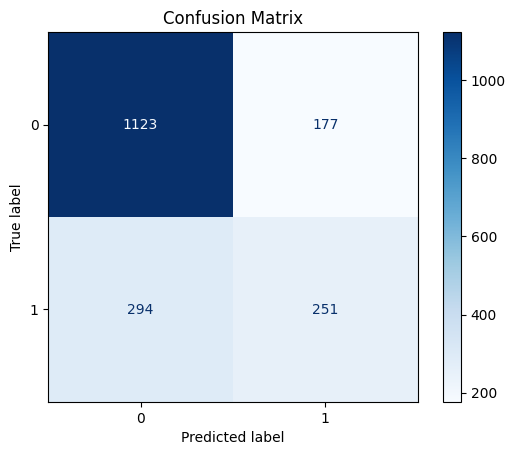

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show plot
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[1123  177]
 [ 294  251]]


**Confusion Matrix Interpretation**:
- True Negatives (TN): 1123 instances were correctly classified as Sober (class 0).
- False Positives (FP): 177 instances were incorrectly classified as Drunk (class 1) when they were actually Sober.
- False Negatives (FN): 294 instances were incorrectly classified as Sober when they were actually Drunk.
- True Positives (TP): 251 instances were correctly classified as Drunk.

The confusion matrix provides insight into the classifier's performance in distinguishing between Sober and Drunk classes. It shows that the classifier performs better at identifying Sober instances (class 0) compared to Drunk instances (class 1). However, there is still a significant number of misclassifications, particularly false negatives, where Drunk instances are incorrectly classified as Sober.


### Future Scope


In the future, we can enhance the model's accuracy by adjusting its settings, exploring better models, refining the features used, and expanding the training data. By fine-tuning parameters, trying advanced models like XGBoost, selecting more informative features, and increasing data diversity, we aim to build a stronger and more reliable classifier for distinguishing between Sober and Drunk instances.

**Following is my Github_Link where the code will be available:**

 https://github.com/saurabhchavan7